### DYLEMAT STUDENTA - WYTRAWNE WINO CZY TANIE I OBIAD?
#### Wyznaczanie jakości wina na podstawie parametrów cieczy. | Aplikacja dla urzędu kontrolującego winiarnie

![](files/wine_image.jpg)


Celem projektu jest porównanie w zależności od problemu(regresja/klasyfikacja) różnego rodzaju modeli wraz z różnego rodzaju hiperparametrami.

● https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
     
Team members:
- Monika Janicka
- Tomasz Kamiński
- Artur Kłapciński
- Elżbieta Kondracka-Zwolska



##### Analizowany zbiór dotyczy portugalskiego czerwonego wina „Vinho Verde”. 
##### Dane zostały zebrane od maja 2004 do lutego 2007.
##### Każda próbka posiada informacje na temat najczęstszych badań fizykochemicznych oraz ostateczną ocenę, która jest medianą ocen trzech ekspertów w skali od 1 do 10.  
##### Zbiór posiada 11 zmiennych wejściowych (m.in. PH, kwasowość, alkohol, chlorki, siarczany) oraz zmienną wyjściową - jakość.

1. [BIBLIOTEKI](#BIBLIOTEKI)  
2. [DANE_&_WYKRESY](#DANE_&_WYKRESY)  
3. [PREPROCESSING](#PREPROCESSING)  
4. [MODELE](#MODELE)  
4.1 [MODEL1_REGRESJA_LINEARNA](##MODEL1_REGRESJA_LINIOWA)  
4.2 [MODEL2_REGRESJA_LOGISTYCZNA](##MODEL2_REGRESJA_LOGISTYCZNA)  
4.3 [MODEL3_DECISION_TREE](##MODEL3_DECISION_TREE)  
4.4 [MODEL4_RANDOM_FOREST](##MODEL4_RANDOM_FOREST)  
4.5 [MODEL5_GBOOST](##MODEL5_XGBOOST)  
5. [PORÓWNANIE_MODELI](#PORÓWNANIE_MODELI)  

<a id='BIBLIOTEKI'></a>
# 1. BIBLIOTEKI

In [203]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
import math
import sklearn   
import sklearn.datasets as datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder    # Sklearn's preprocessing library  
from sklearn.linear_model import LinearRegression   
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import sklearn.metrics
import sklearn.model_selection
import sklearn.tree as tree                                        # DRZEWO DECYZYJNE
from scipy import stats
from sklearn.model_selection import cross_validate, GridSearchCV ,RandomizedSearchCV      # DO WALIDACJI SKROŚNEJ(KRZYŻOWEJ)
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV   # Importing train and test data split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree    # DRZEWO DECYZYJNE
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.linear_model import LinearRegression
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score,classification_report, mean_squared_error, plot_roc_curve
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier # Classifiers
from sklearn.linear_model import LogisticRegression        # estymator klasyfikacji=klasyfikator
from mlxtend import plotting

# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC, SVR
from IPython.display import Image
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import fetch_california_housing 
from yellowbrick.model_selection import FeatureImportances
import statsmodels.api as sm 
from sklearn.decomposition import PCA # analiza głównych składowych - w celu redukcji wymiarowości danych
from scipy import signal
import scipy 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import fbeta_score, make_scorer
from time import time
import scikitplot as skplt
import graphviz.backend as be
from dtreeviz.trees import *
import warnings
warnings.filterwarnings('ignore')

<a id='DANE'></a>
# 2. DANE I WYKRESY

Zbiór zawiera 1599 wierszy i 11 kolumn.
Zmienną wynikową jest quality.


In [2]:
wine = pd.read_csv("winequality-red.csv") 
wine # display the data frame
wine.head(11)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5

#### Pairplot

In [3]:
def pairplot():
    sns.pairplot(wine, hue="quality")
    plt.suptitle('Wykresy - rozkład zmiennych', y=1.03, fontsize=18, fontweight='semibold');

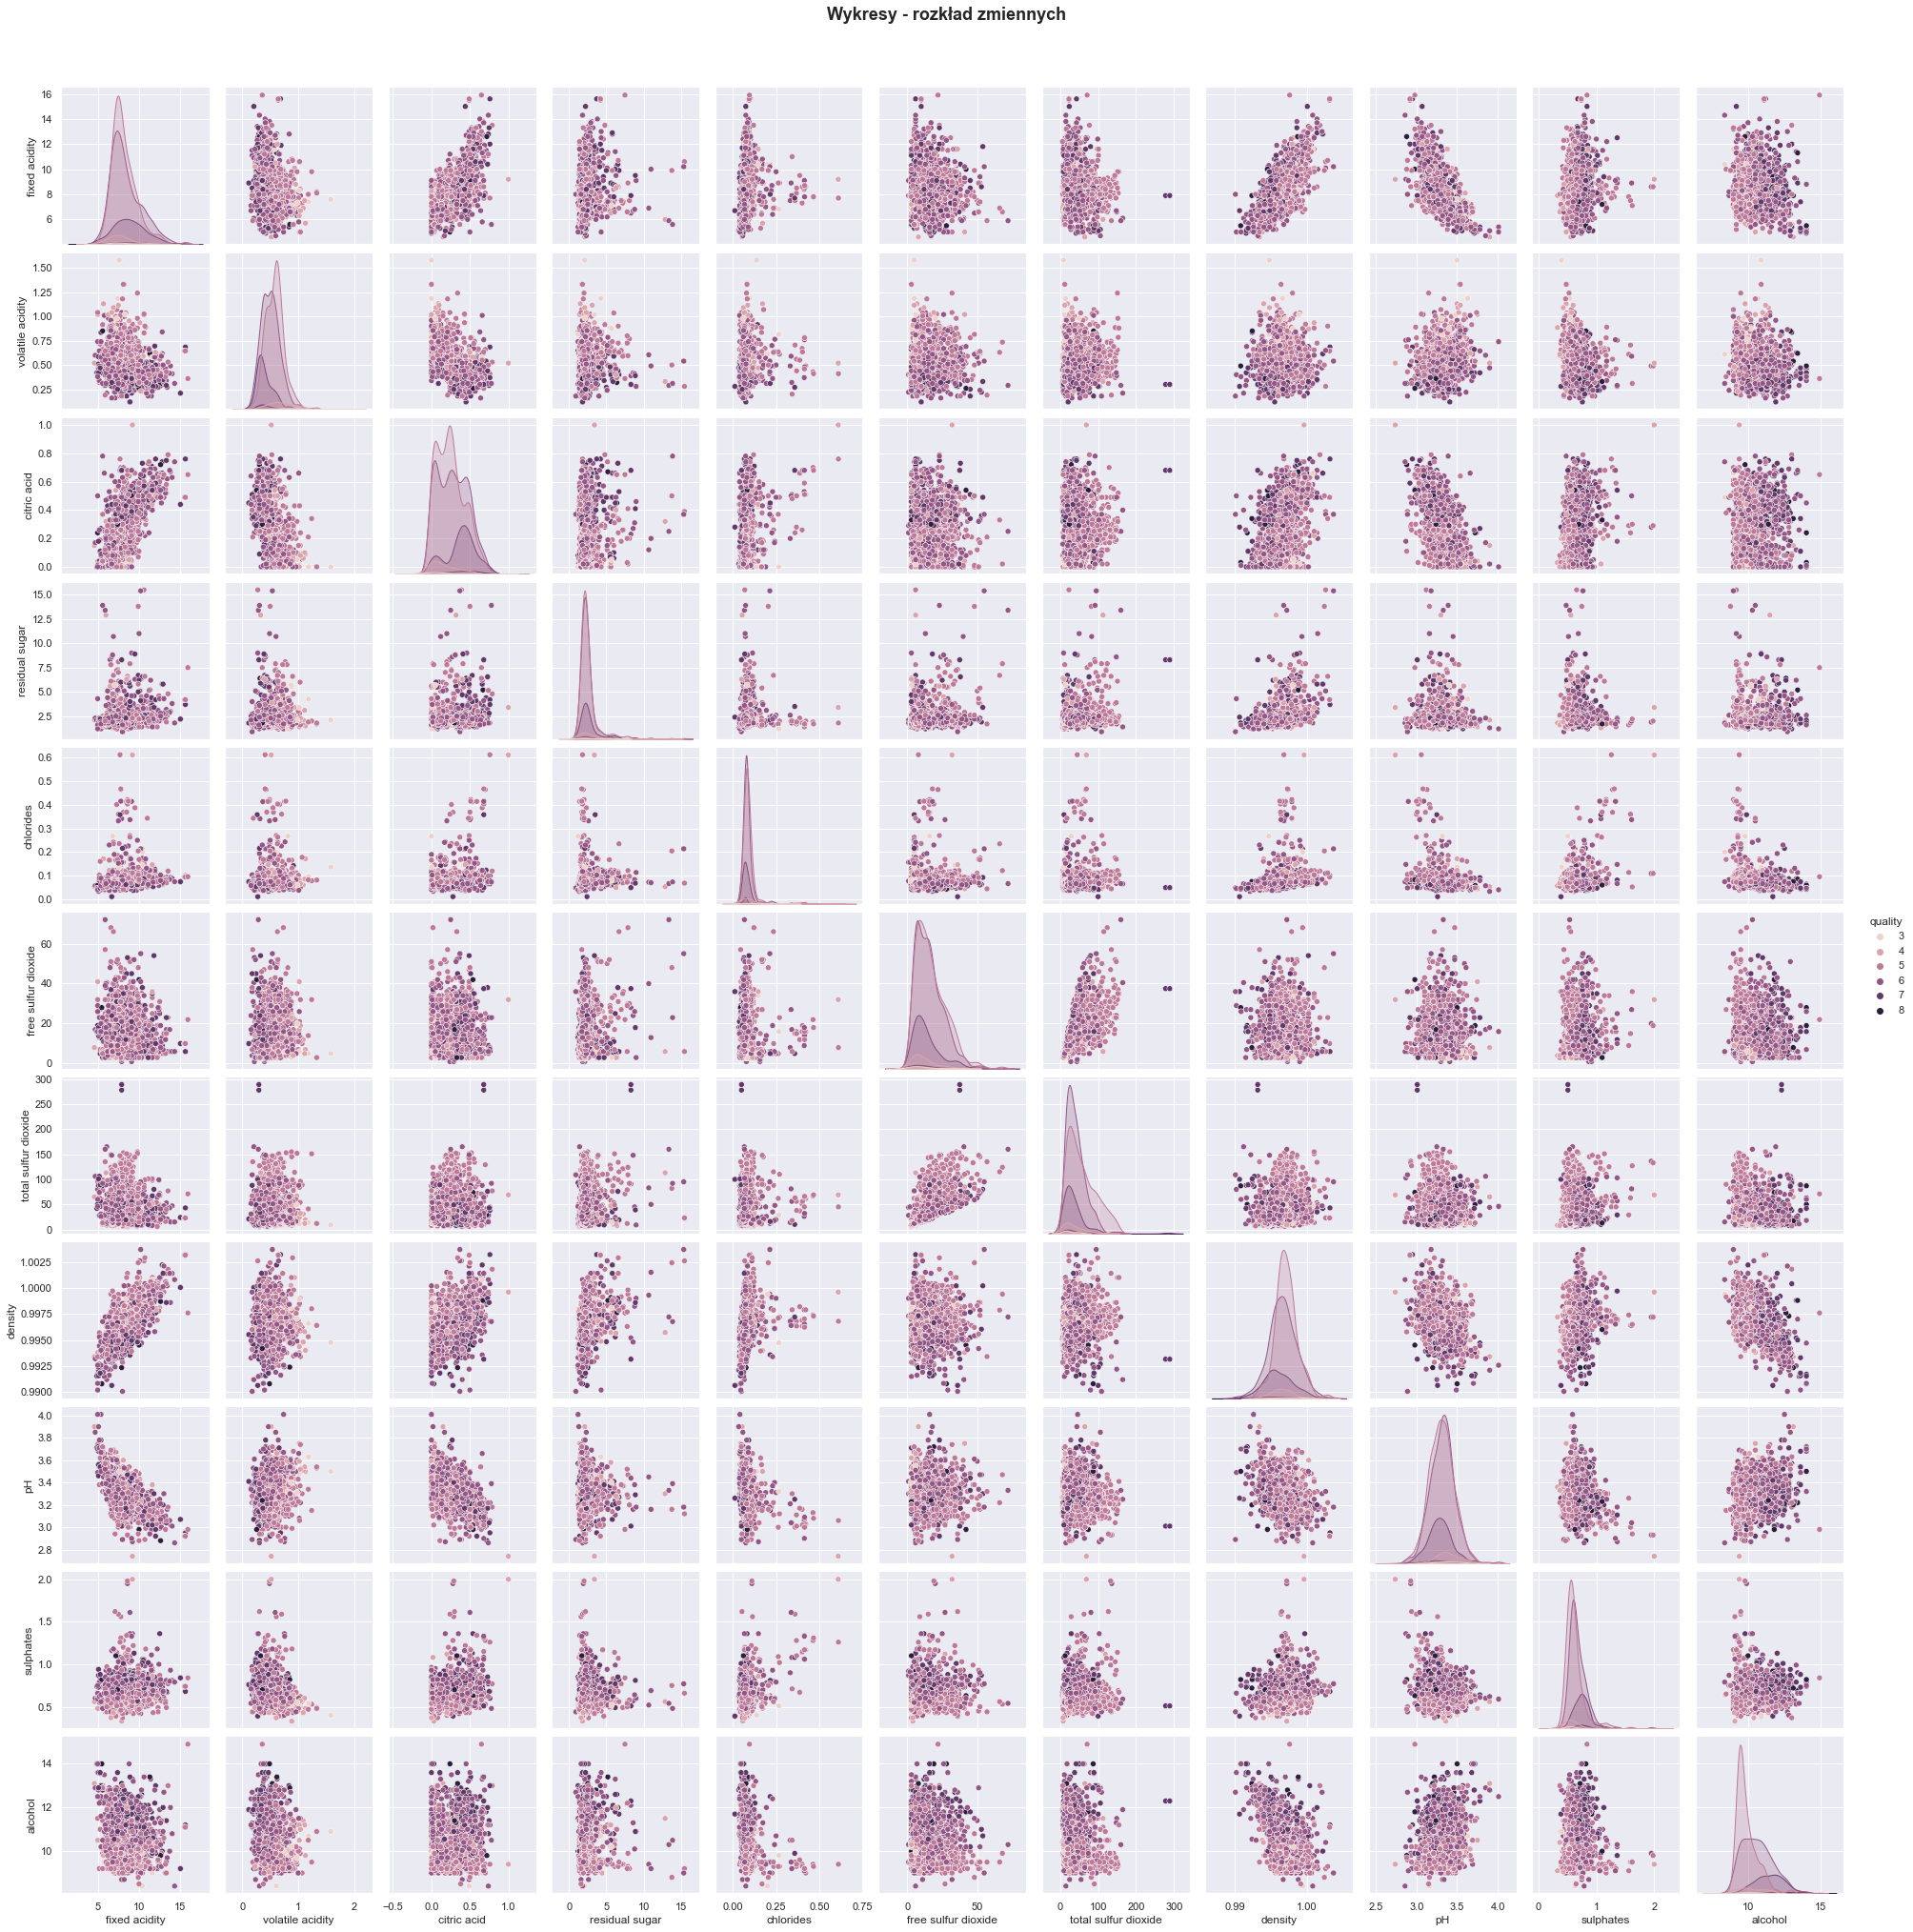

In [4]:
pairplot();

In [5]:
def wykresy_pudelkowe():
    wine.plot(kind= 'box', 
        subplots=True, 
        layout=(4,4), 
        figsize=(15,12)),
    plt.suptitle('Wykresy - rozkład zmiennych', y=1.03, fontsize=18, fontweight='semibold');

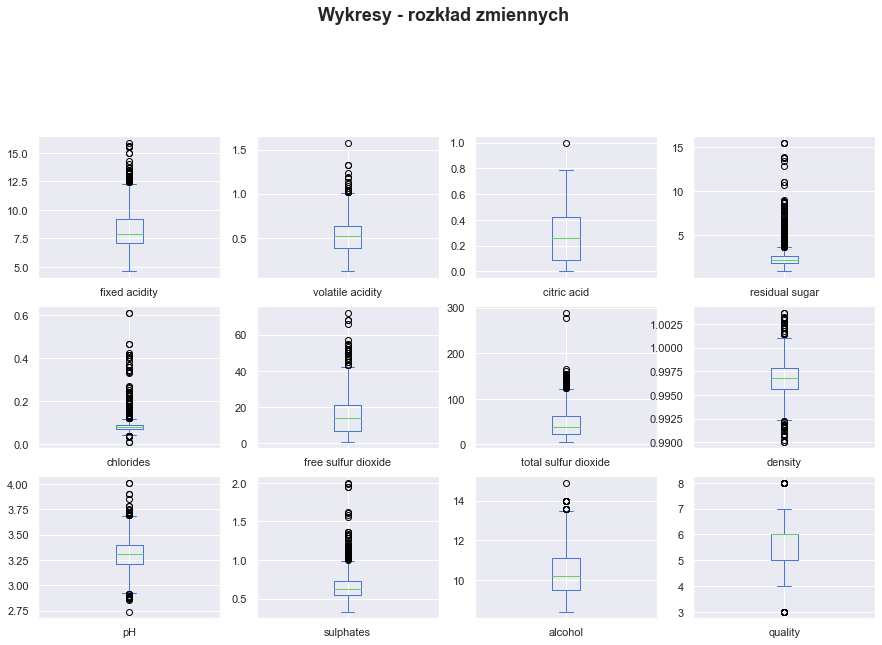

In [6]:
wykresy_pudelkowe();

#### Boxploty i barploty

In [7]:
def wykresy_zmienne():
    for i in wine.columns[:-1]:
        plt.figure()
        sns.barplot(x=wine.quality, y=wine[i])
        plt.plot()
    

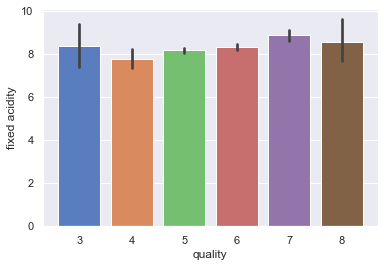

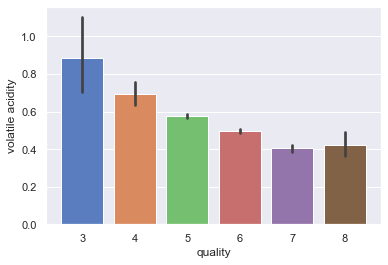

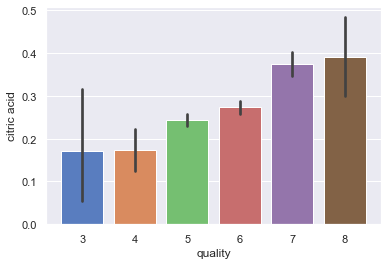

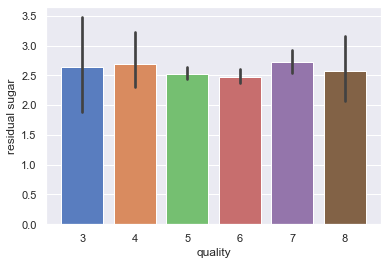

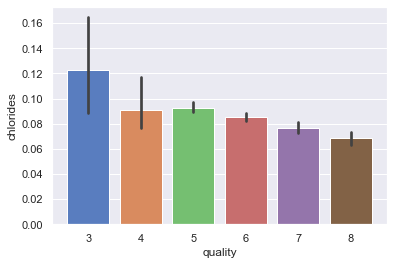

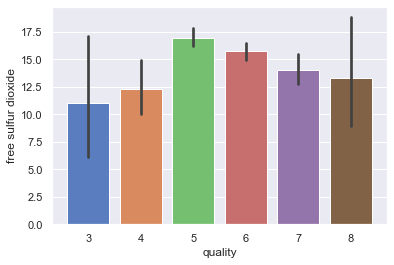

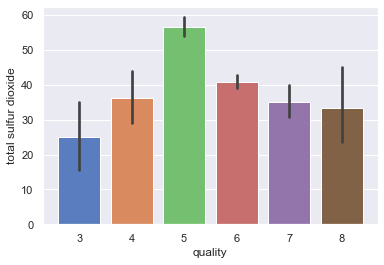

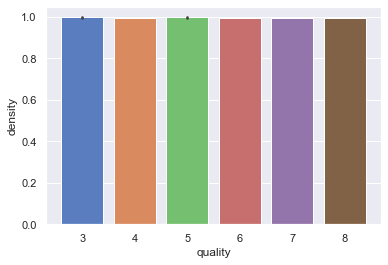

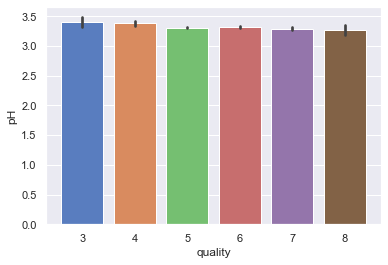

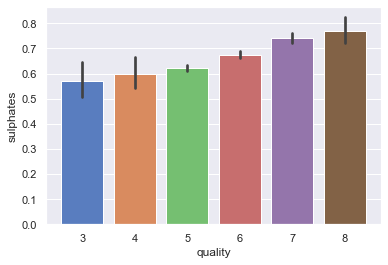

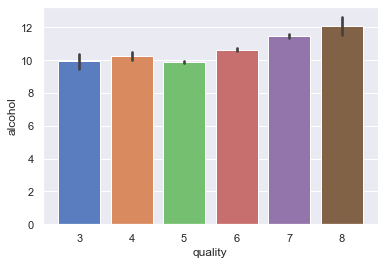

In [8]:
wykresy_zmienne();

In [9]:
def wykresy_zmienne_1():
    for i in wine.columns[:-1]:
        plt.figure()
        sns.boxplot(x=wine.quality, y=wine[i])
        plt.plot()

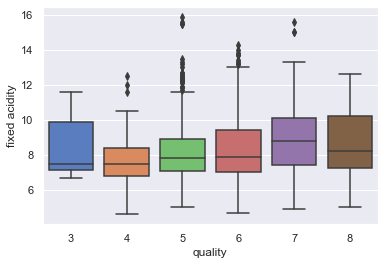

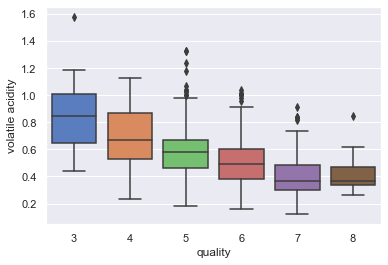

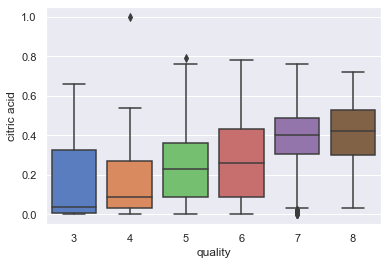

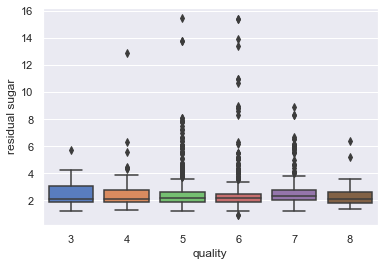

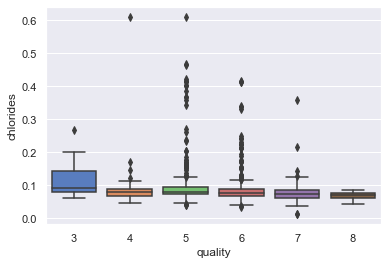

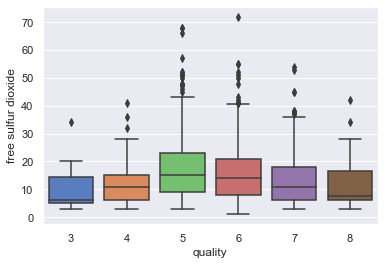

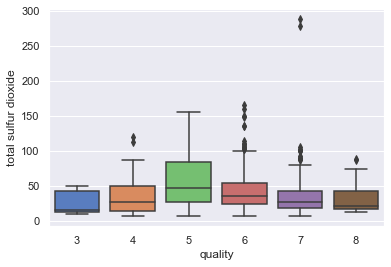

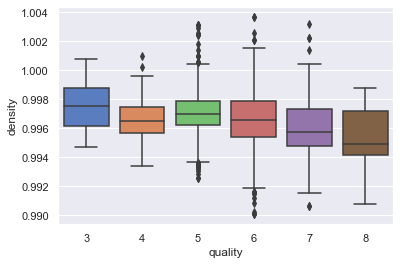

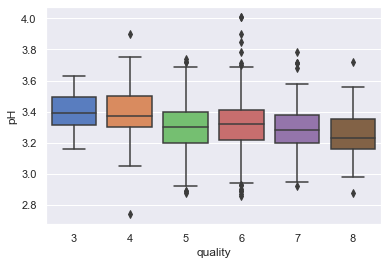

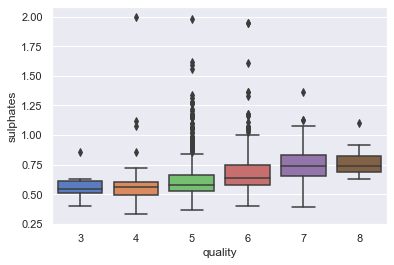

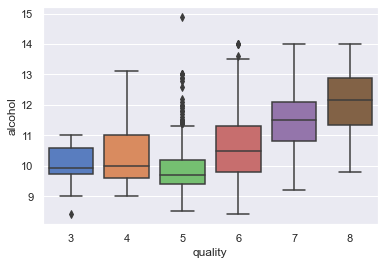

In [10]:
wykresy_zmienne_1()

#### Analiza korelacji.

In [11]:
def analiza_korelacji():
    f,ax = plt.subplots(figsize=(13,10))
    mask = np.triu(np.ones_like(wine.corr(method='spearman')), k=0)
    sns.set(font_scale=1)
    sns.heatmap(wine.corr(method='spearman'), annot=True, linewidths=1, fmt='.2f', ax=ax, cmap="turbo", annot_kws={'fontsize':12}, mask=mask)
    plt.suptitle('Analiza korelacji', y=1.03, fontsize=18, fontweight='semibold');

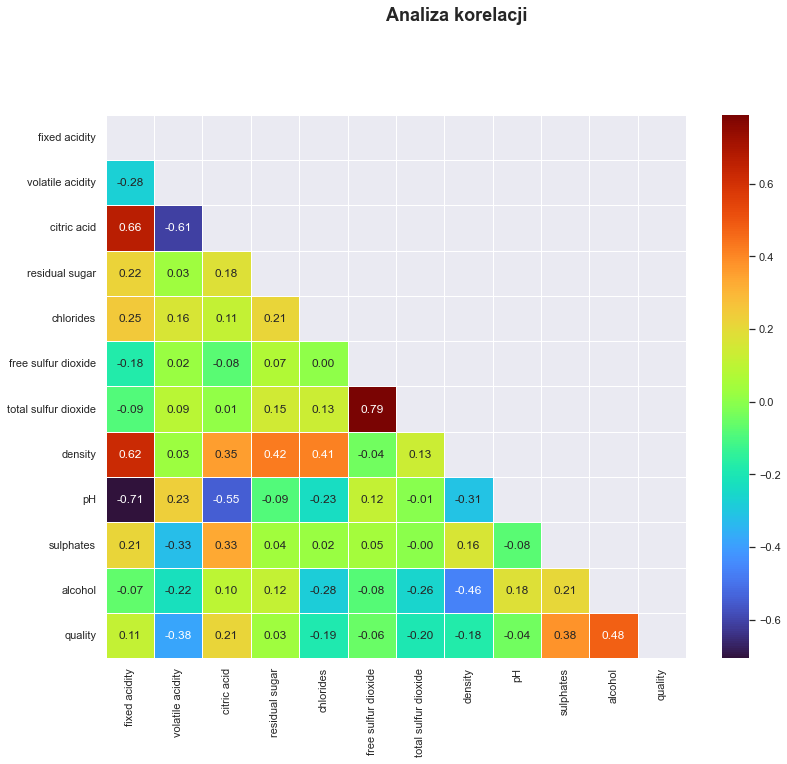

In [12]:
analiza_korelacji()

<a id='PREPROCESSING'></a>
# 3. PREPROCESSING

- #### Analiza duplikatów
 Zbiór zawiera 240 zduplikowanych wartości. 
Ponieważ nie ma informacji o tym, jak pobrano próbki zestawu danych, zakładamy, że mamy do czynienia z drugim przypadkiem i dlatego zachowujemy duplikaty.

- #### Analiza brakujących wartości
Zbiór nie zawiera brakującyh wartości

- #### Na podstawie wstępnej analizy danych do modelu zostało wybranych 7 zmiennych:  
    volatile acidity, citric acid,total sulfur dioxide, density, sulphates, alcohol, quality.

- #### Usuwamy outliery

#### Analiza duplikatów
Zbiór zawiera 240 zduplikowanych wartości. 
Ponieważ nie ma informacji o tym, jak pobrano próbki zestawu danych, zakładamy, że mamy do czynienia z drugim przypadkiem i dlatego zachowujemy duplikaty.

In [13]:
#Analiza duplikatów
wine.duplicated().sum()

240

#### Brakujące wartości
Zbiór nie zawiera brakującyh wartości

In [14]:
wine.isnull().sum()
#Zbiór nie zawiera braków danych.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Na podstawie wstępnej analizy danych do modelu zostało wybranych 7 zmiennych: 
    volatile acidity, citric acid,total sulfur dioxide, density, sulphates, alcohol,quality   

In [15]:
wine.drop(['fixed acidity','residual sugar','chlorides','free sulfur dioxide','pH'], axis=1, inplace=True)

In [16]:
wine.head()

volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
0              0.70         0.00                  34.0   0.9978       0.56   
1              0.88         0.00                  67.0   0.9968       0.68   
2              0.76         0.04                  54.0   0.9970       0.65   
3              0.28         0.56                  60.0   0.9980       0.58   
4              0.70         0.00                  34.0   0.9978       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [17]:
# funkcja zwracająca cechy numeryczne
def get_quant_features(wine):
    feats = wine.select_dtypes([np.number, np.bool]).columns
    return [x for x in feats]

In [18]:
# funkcja rysująca histogramy dla numerycznych cechy
def draw_histograms(wine, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(16,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        wine[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

In [19]:
def wykres_feats():
    feats = get_quant_features(wine)
    draw_histograms(wine, feats, 2, 4) # dwa wiersze i cztery kolumny
    plt.suptitle('Rozkład wybranych zmiennych', y=1.03, fontsize=18, fontweight='semibold');

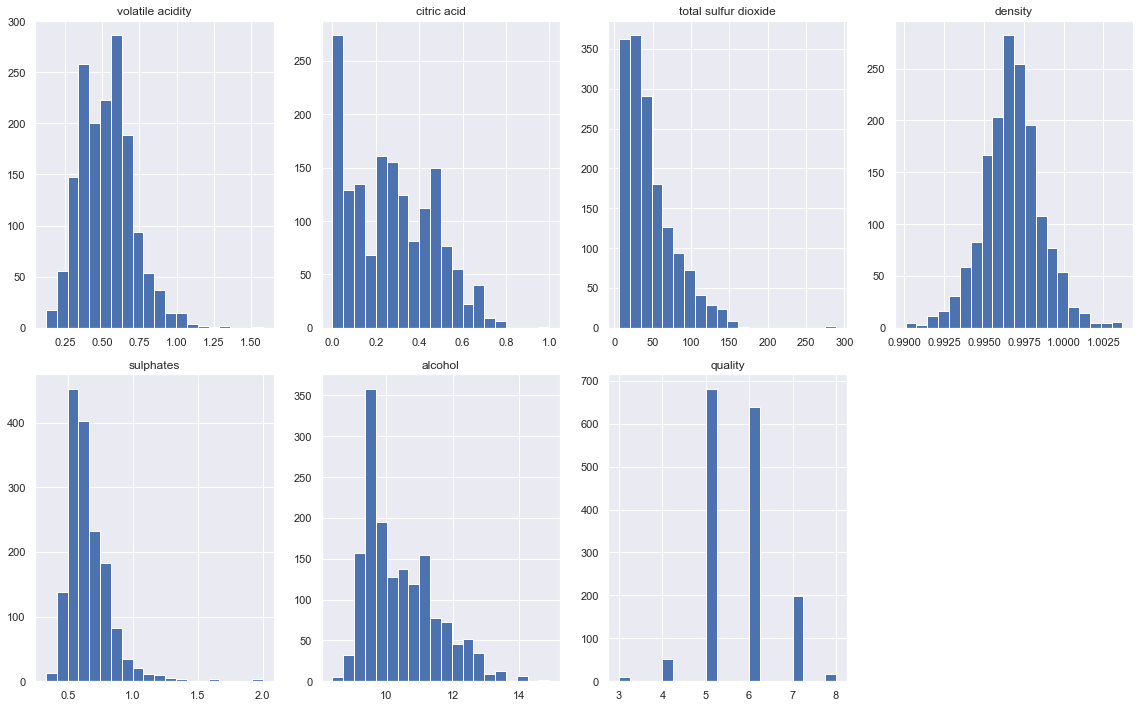

<Figure size 432x288 with 0 Axes>

In [20]:
wykres_feats();

#### Usuwamy outliery

In [21]:
columns = ['volatile acidity', 'citric acid', 
         'total sulfur dioxide', 'density',
       'sulphates', 'alcohol','quality']

In [22]:
def rm_out(wine):
    df_out = wine.copy()
    means, stdevs = {}, {}
    for column in df_out.columns:
        means[column] = df_out[column].mean()
        stdevs[column] = df_out[column].std()
    for column in df_out.columns:
        lower = means[column] - 3 * stdevs[column]
        upper = means[column] + 3 * stdevs[column]
        index = (lower < df_out[column]) & (df_out[column] < upper)
        df_out = df_out[index]
    df_out.index = range(len(df_out))
    return df_out

In [23]:
df= rm_out(wine[columns])

In [24]:
df["quality"].value_counts()

5    643
6    616
7    192
4     49
8     16
Name: quality, dtype: int64

#### Przekształcamy zmienne zależne na wartości binarne :
- 1 - 
  Wina powyżej lub równe 7 zostały zmienione na 1, co oznacza wino dobrej jakości;
- 0 -
  Wina o quality mniejszej od 7  zostały zmnienione na 0: zła lub przeciętna jakość

        
Zbiór danych ma znacznie większą liczbę wartości 0, co wskazuje, że dane zawierają więcej wierszy, które reprezentują złą jakość wina. 
Zbiór jest mocno niezbalansowany.

In [25]:
df["quality"] = df["quality"].astype(object)

In [26]:
bins = [2, 6.5, 8]
values = ["bad", "good"]
df["quality"] = pd.cut(df["quality"], bins=bins, labels= values)

In [27]:
df["quality"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [28]:
label_qlt = LabelEncoder()

In [29]:
df["quality"] = label_qlt.fit_transform(df["quality"])

In [30]:
df["quality"].value_counts()

0    1308
1     208
Name: quality, dtype: int64

In [31]:
def wykres_quality():
    sns.countplot(x ="quality", data = df)
    plt.show()
    plt.suptitle('Rozkład zmiennej wynikowej', y=1.03, fontsize=18, fontweight='semibold');

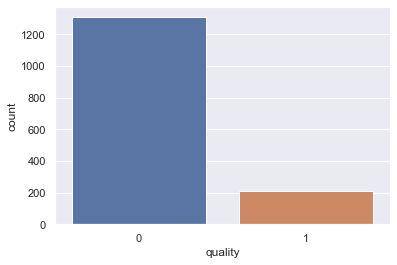

<Figure size 432x288 with 0 Axes>

In [32]:
wykres_quality();

#### Podział zbioru na treningowy i testowy

In [33]:
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = df.quality, random_state=42)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1212, 6)
The shape of X_test is: (304, 6)
The shape of y_train is: (1212,)
The shape of y_test is: (304,)


#### Standaryzacja
     Do niektórych modeli dane muszą być znormalizowane. 
     W tym celu tworzymy kopię danych, które poddajemy standaryzacji.
     Model drzewa decyzyjnego i lasu losowego budowany jest na danych niestandaryzwoanych.
     Ponieważ zbiór jest mocno niezrónoważony stosujemy oversampling - metody SMOTE.

In [34]:
scaler = StandardScaler().fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

#### Wykresy

In [35]:
def wykres_plotting():
    from mlxtend.plotting import scatterplotmatrix 
    cols = ['volatile acidity', 'citric acid', 
         'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'] 
    scatterplotmatrix(df[cols].values, figsize=(20, 28),names=cols, alpha=0.5)
    plt.tight_layout() 
    plt.show()
    plt.suptitle('Wykresy - rozkład zmiennych', y=1.03, fontsize=18, fontweight='semibold');
# macierz wykresów stanowi przydatne graficzne pods występujących w zbiorze danych.

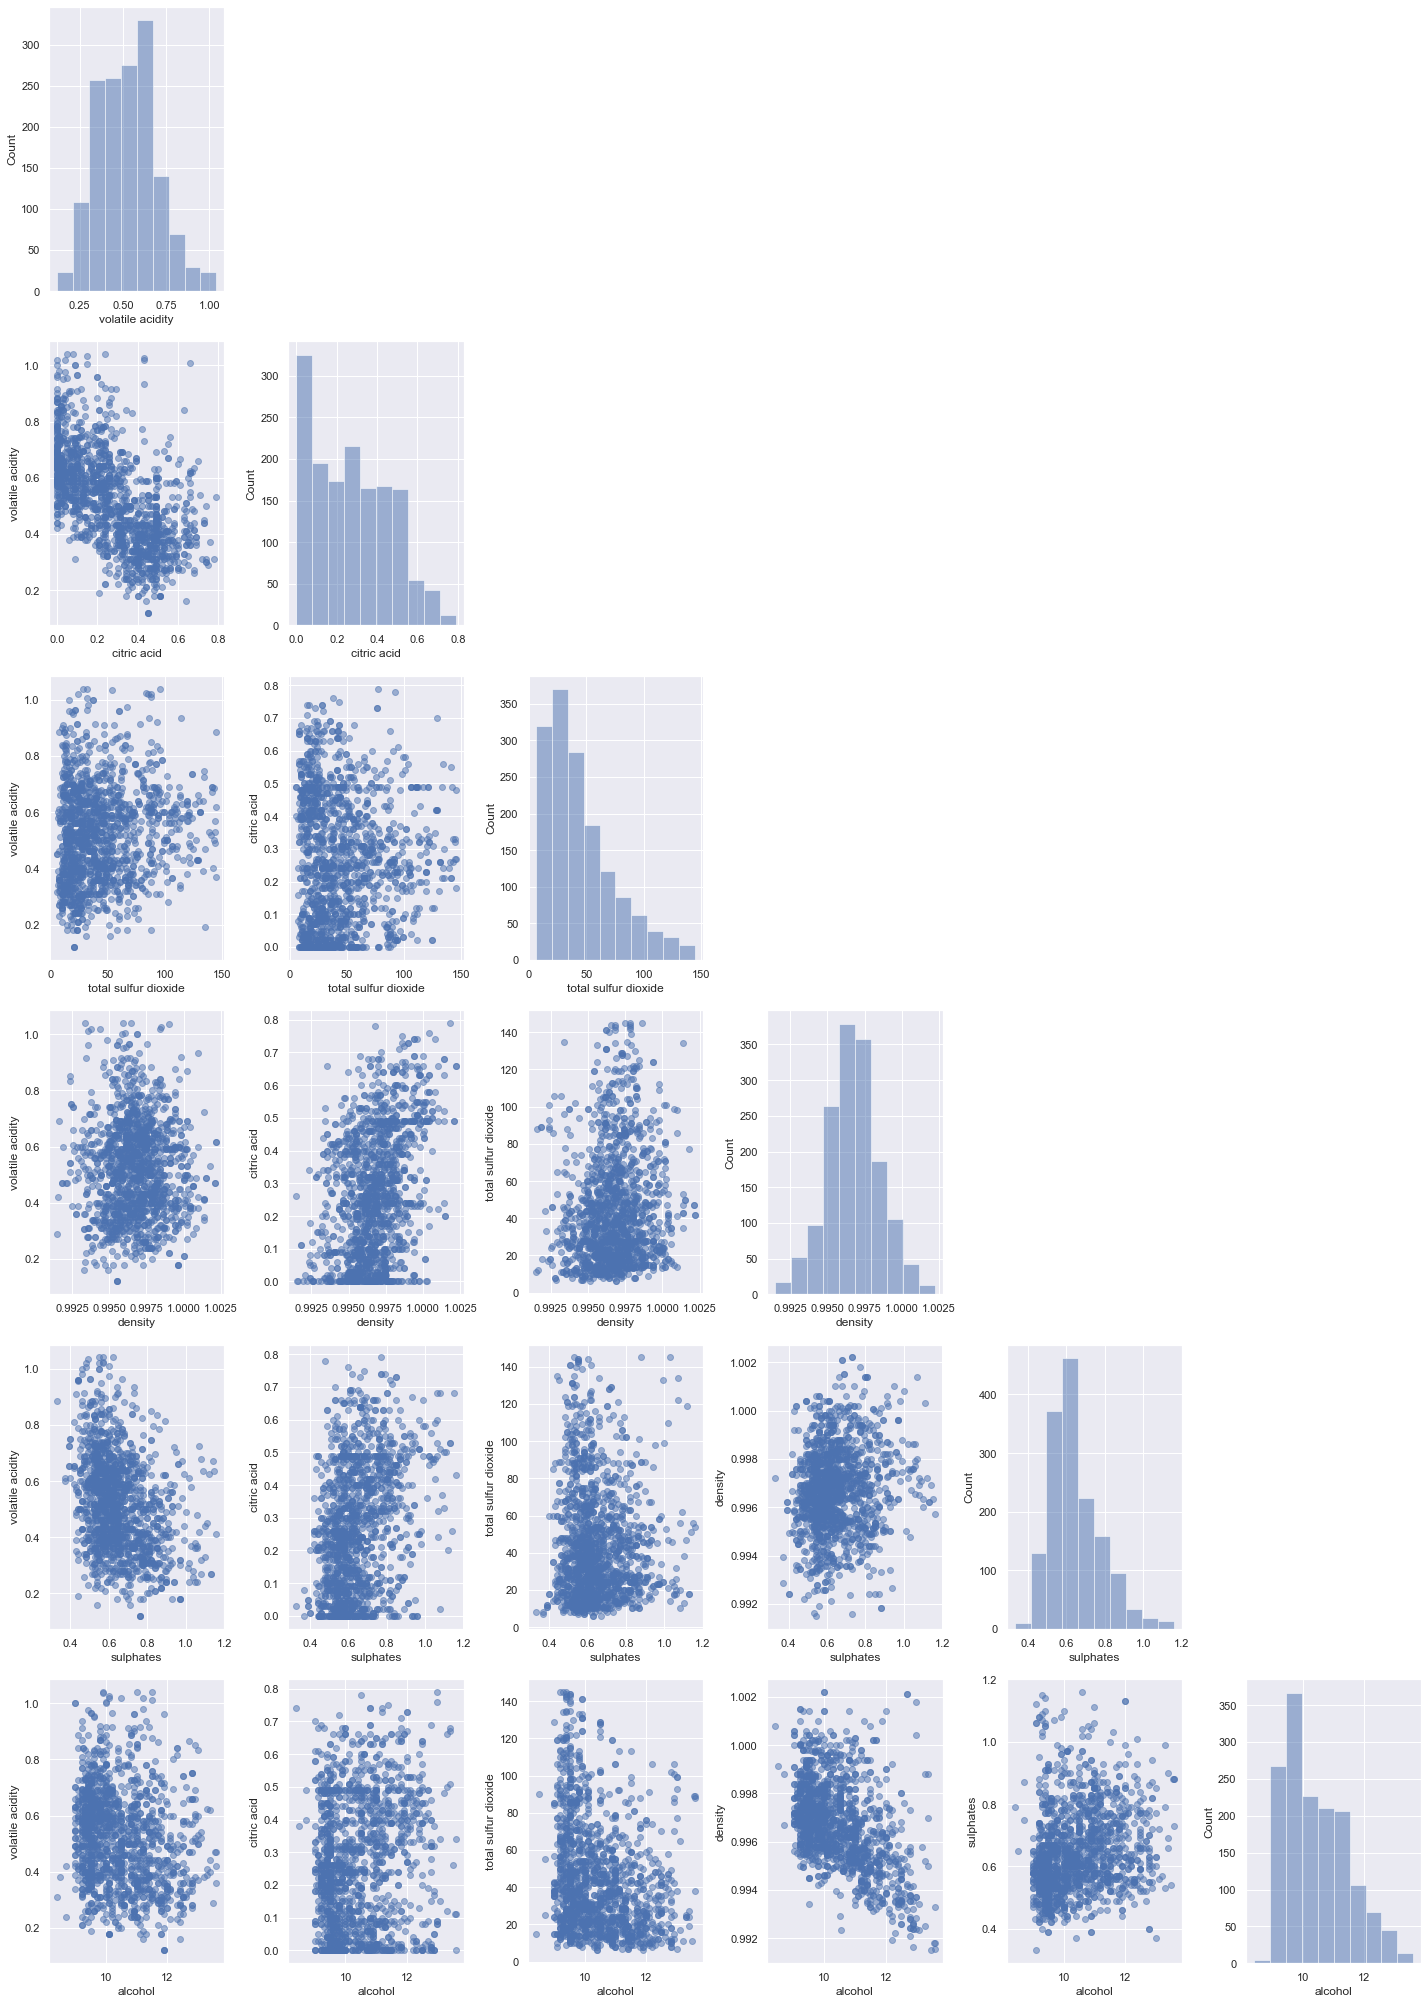

<Figure size 432x288 with 0 Axes>

In [36]:
wykres_plotting();

In [37]:
def wykres_rownolegly():
# Wykres współrzędnych równoległych Dla danych wielowymiarowych
    from pandas.plotting import ( parallel_coordinates,) 
    fig, ax = plt.subplots (figsize=(21, 4))
    new_df = X.copy() 
    new_df["target"] = y
    parallel_coordinates(new_df, "target", ax=ax,colormap="viridis", alpha=0.5,)
    ax.set_xticklabels ( ax.get_xticklabels(), rotation=45)

    ax.set_title("Współrzędne równoległe 6 cech")

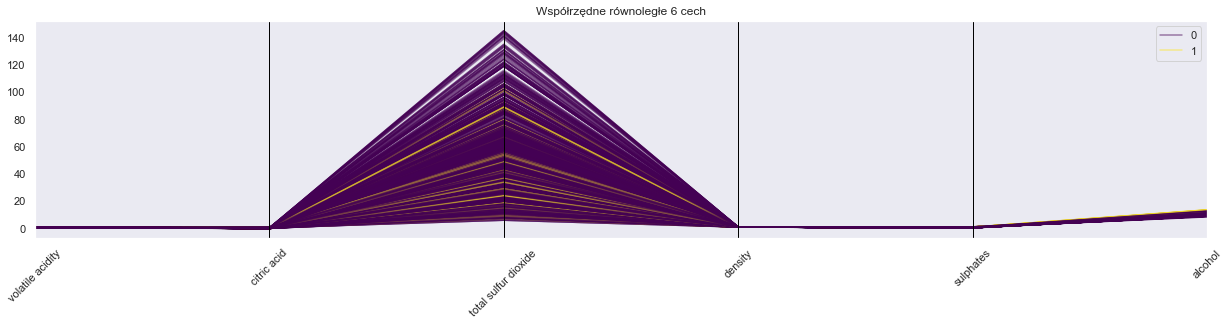

In [38]:
wykres_rownolegly()

In [39]:
def wykres_odrebnosci_cech():
# Wykres ma postać koła w którego wnętrzu znajdują się punkty reprezentujące próbki danych a na obrzeżach cechy. Wartości są znormalizowane. Każdy punkt jest połączony za pomocą sprężyny z cechami do których jest przyciągany. 
# Jest to jeden ze sposobów wizualizowanie odrębności cech
    from pandas.plotting import radviz
    fig, ax = plt.subplots (figsize=(16, 16))
    new_df = X.copy() 
    new_df ["target"] = y
    radviz(new_df, "target", ax=ax, colormap="PiYG")
    ax.set_title("Wykres RadViz 8 cech") 

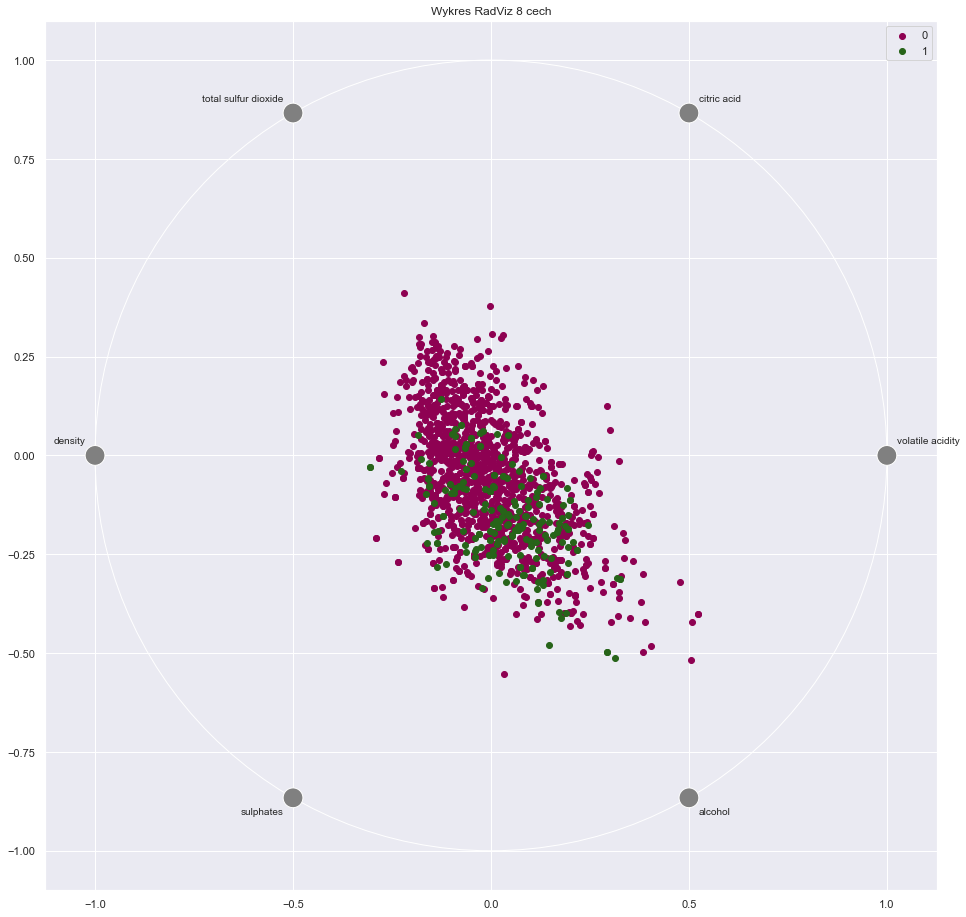

In [40]:
wykres_odrebnosci_cech()

<a id='MODELE'></a>
# 4. MODELE

Ponieważ zmienna wynikowa po przekształceniu przyjmuje wartości 0 lub 1 wybraliśmy następujące modele:
- Logistic Regression
- Decision Tree
- RandomForest
- XgBoost
    
Modele te zostały wybrane, żeby móc odpowiedzieć na następujące pytania:
- Który algorytm uczenia maszynowego umożliwi najdokładniejsze przewidywanie jakości wina na podstawie jego właściwości fizykochemicznych?
- Jakie właściwości fizykochemiczne czerwonego wina mają największy wpływ na jego jakość?
    
Stworzyliśmy również model K-Means.


#### Zastosowane metryki:
    - Recall
    - Precision
    - F1
    - AUC

<a id='MODEL2_REGRESJA_LOGISTYCZNA'></a>
## 4.1. MODEL REGRESJA LOGISTYCZNA

In [41]:
model_LR=LogisticRegression().fit(X_train_scal,y_train)

In [42]:
##współczynniki - beta mówią o ważności zmiennych, jak dany czynnik wpływa na prawdopodobieństwo.
model_LR.coef_

array([[-0.45049787,  0.07000906, -0.5762978 , -0.00972262,  0.72285445,
         1.05574208]])

In [43]:
X_train.columns

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

In [44]:
pred_test=model_LR.predict(X_test_scal)

In [45]:
#Ocena jakości modelu
score = model_LR.score(X_test_scal,y_test)
print("The score is {}".format(score))
  
prec = precision_score(y_test, pred_test)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, pred_test)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, pred_test)
print("The F1-Score is {}".format(f1))

The score is 0.9046052631578947
The precision is 0.6756756756756757
The recall is 0.5952380952380952
The F1-Score is 0.6329113924050633


In [46]:
print(classification_report(y_test, pred_test,target_names=["słabe", "dobre"]))

              precision    recall  f1-score   support

       słabe       0.94      0.95      0.95       262
       dobre       0.68      0.60      0.63        42

    accuracy                           0.90       304
   macro avg       0.81      0.77      0.79       304
weighted avg       0.90      0.90      0.90       304



In [47]:
def confusion_matrix_LR():
    LABELS = ['słabe', 'dobre']
    conf_matrix = confusion_matrix(y_test, pred_test)
    plt.figure(figsize =(5, 5))
    sns.heatmap(conf_matrix, xticklabels = LABELS, 
                yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

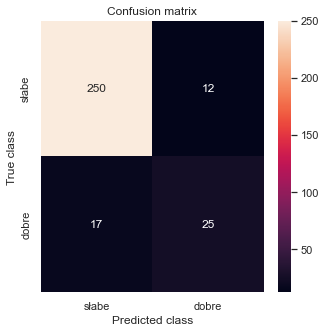

In [48]:
confusion_matrix_LR()

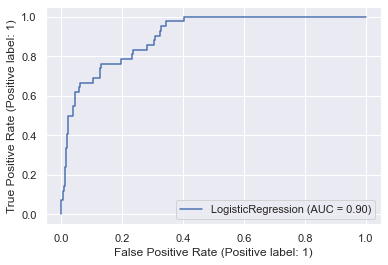

In [49]:
RocCurveDisplay.from_estimator(model_LR, X_test_scal, y_test);

In [50]:
# Predicting Cross Validation Score
cv=cross_val_score(model_LR, X_train_scal, y_train, cv=10).mean()
print("Cross Validation Score : ", cv)

Cross Validation Score :  0.8754098360655738


#### GridSearchCV

In [51]:
params = {'C': [0.001,0.01,0.1,1,10],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [52]:
grid_search = GridSearchCV(LogisticRegression(penalty='l2'), param_grid=params,scoring='recall',cv=5)

grid_search.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [53]:
print(grid_search.best_score_)
print(grid_search.score(X = X_test_scal, y = y_test))
print(grid_search.best_params_)

0.39732620320855616
0.6428571428571429
{'C': 0.001, 'solver': 'liblinear'}


<a id='MODEL3_DECISION_TREE'></a>
## 4.2. MODEL DECISION TREE

In [54]:
#Create an object (model)
dt = DecisionTreeClassifier(
random_state=42, 
max_depth=5,
class_weight=None,
criterion='gini', 
max_features=None, 
max_leaf_nodes=None,
min_impurity_decrease=0.0, 
min_samples_leaf=2, 
min_weight_fraction_leaf=0.0,  
splitter='best')
dt.fit(X_train, y_train) 

dt.score (X_test, y_test)

0.8881578947368421

In [55]:
dt.predict_proba (X.iloc[[0]]) 

array([[1., 0.]])

In [56]:
# Walidacja
cv_results = cross_val_score(dt,X, y,cv=5)  #ilokrotność walidacji cv(razy: trening na 4, testowanie na jednej | dzięki wielu podziałom można zobczyć jak radzi sobie z danymi
print(f'Scores: {np.round(cv_results,3)}')

Scores: [0.872 0.802 0.894 0.818 0.861]


In [57]:
print(f'Scores mean: {np.round(np.mean(cv_results),3)}') #liczę średnią ze scorów z kroswalidacji, wynik zbliżony z wynikiem score

Scores mean: 0.85


In [58]:
# 5 sprawdzamy dokładność, w regresji było accuracy, tutaj score
dt.score( X_test,y_test)   # wartość r2, kroswalidacja robi pięciokrotne taka czynność na 4 treningowych | SCORE Z DANYCH I TARGETU , MODEL JEST FITOWANY DO TYCH DANYCH
#powinno być powyżej 0,9, score jest właściwy dla danych zbalansowanych

0.8881578947368421

In [59]:
# Poniżej przedstawiony jest kod wizualizujący ważności cech Giniego (dzięki nim można zmniejszyć błąd modelu):

for col, val in sorted(zip (X.columns, dt.feature_importances_),
key=lambda x: x[1], reverse=True,
)[:5]:
    print(f" {col:10} {val: 10.3f}") 

 alcohol         0.422
 sulphates       0.282
 total sulfur dioxide      0.113
 volatile acidity      0.105
 citric acid      0.063


In [60]:
def wykres_waznosci_Cech_drzewo():
    # Wykres ważności cech w odniesieniu do największej bezwzględnej wartości współczynnika regresji. Użyta do tej funkcja wizualizuj sama argument relative= True który powoduje że największej wartość jest przypisywana liczba 
    # 100 lub minus 100 a pozostałem wartością proporcjonalnie mniejsze liczby. 
    from yellowbrick.model_selection import FeatureImportances
    fig, ax = plt.subplots (figsize=(6, 4))
    fi_viz = FeatureImportances (dt)
    fi_viz.fit(X, y)
    fi_viz.ax.set(title="Ważność 6 cech (drzewo decyzyjne)", xlabel = "Względna ważność")

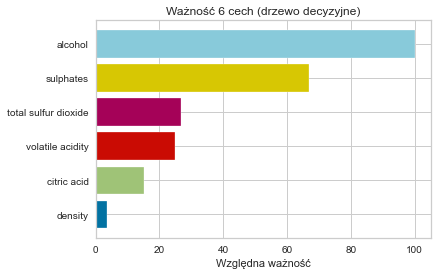

In [61]:
wykres_waznosci_Cech_drzewo()

In [62]:
X

volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
0                0.700         0.00                  34.0  0.99780       0.56   
1                0.880         0.00                  67.0  0.99680       0.68   
2                0.760         0.04                  54.0  0.99700       0.65   
3                0.280         0.56                  60.0  0.99800       0.58   
4                0.700         0.00                  34.0  0.99780       0.56   
...                ...          ...                   ...      ...        ...   
1511             0.600         0.08                  44.0  0.99490       0.58   
1512             0.550         0.10                  51.0  0.99512       0.76   
1513             0.510         0.13                  40.0  0.99574       0.75   
1514             0.645         0.12                  44.0  0.99547       0.71   
1515             0.310         0.47                  42.0  0.99549       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1511     10.5  
1512     11.2  
1513     11.0  
1514     10.2  
1515     11.0  

[1516 rows x 6 columns]

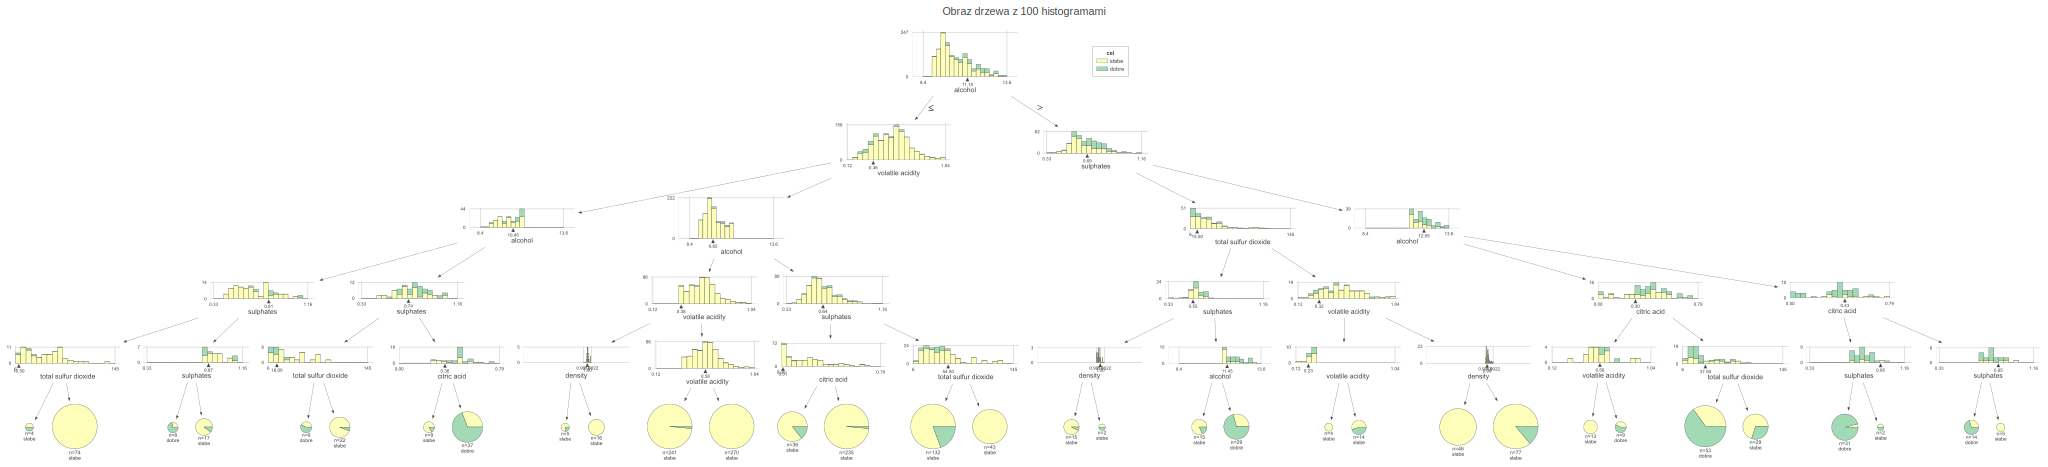

In [63]:
viz = dtreeviz(dt, X,y,target_name="cel",feature_names=X.columns, class_names=["słabe", "dobre"],scale=(0.8),title="Obraz drzewa z 100 histogramami")
viz   

In [64]:
prediction_tr = dt.predict(X_train)
prediction_ts = dt.predict(X_test)
print(sklearn.metrics.classification_report(y_test, prediction_ts, target_names=["słabe", "dobre"]))

              precision    recall  f1-score   support

       słabe       0.94      0.94      0.94       262
       dobre       0.60      0.60      0.60        42

    accuracy                           0.89       304
   macro avg       0.77      0.77      0.77       304
weighted avg       0.89      0.89      0.89       304



In [65]:
print('accuracy train data is',accuracy_score(y_train,prediction_tr))
print('accuracy test data is',accuracy_score(y_test,prediction_ts))

accuracy train data is 0.9158415841584159
accuracy test data is 0.8881578947368421


In [66]:
print('recall train data is',recall_score(y_train,prediction_tr,average="macro"))
print('recall test data is',recall_score(y_test,prediction_ts,average="macro"))

recall train data is 0.7992006265981708
recall test data is 0.7651762995274445


In [67]:
# get confusion matrix
predictions = dt.predict(X_test)
matrix = sklearn.metrics.confusion_matrix(y_test, predictions)
matrix

array([[245,  17],
       [ 17,  25]], dtype=int64)

In [68]:
# 9 Użyteczną metryką jest f1_score - średnia harmoniczna precyzji i czułości
# "micro" is preferrable, "macro" is good if there is no class imbalance
sklearn.metrics.f1_score(y_test, predictions, average="micro")  #micro -ustala w jaki sposób będziemy uśedniać po klasach

0.8881578947368421

[Text(0.5, 1.0, 'Tablica pomyłek klasyfikatora drzewa '),
 Text(0.5, 0, 'Klasa prognozowana'),
 Text(0, 0.5, 'Klasa rzeczywista')]

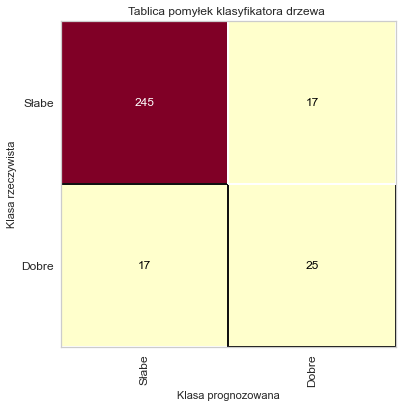

In [69]:
from yellowbrick.classifier import (ConfusionMatrix,)

mapping = {0: "Słabe", 1: "Dobre"} 
fig, ax = plt.subplots (figsize=(6, 6)) 
cm_viz = ConfusionMatrix( dt,classes=["Słabe", "Dobre"], label_encoder=mapping,) 
cm_viz.score (X_test, y_test) 
cm_viz.ax.set(title="Tablica pomyłek klasyfikatora drzewa ", xlabel="Klasa prognozowana", ylabel="Klasa rzeczywista")
# Ćwiartki lewa górna i prawa dolna zawierają poprawne wyniki klasyfikacji, a lewa dolna i prawa górna -błędne; ćwiartka lewa dolna zawiera wyniki fałszywie negatywne 
# a prawa górna - fałszywie pozytywne.  Centrum dobrego klasyfikatora są duże wartości prawdziwych wyników na przekątnej tabeli

In [70]:
from yellowbrick.classifier import (ClassificationReport,)
def drzewo_raport_klasyfikacyjny():


    # Raport klasyfikacyjny prezentujący precyzję, czułośc, wskaźnik F1 dla wyników pozytywnych i negatywnych. 
    # Im dany wskaźnik jest lepszy -bliższy jedności -tym komórka jest bardziej czerwona

    fig, ax = plt.subplots (figsize=(6, 3))
    cm_viz = ClassificationReport( dt,classes=["SŁABE", "DOBRE"], label_encoder=mapping)

    cm_viz.score (X_test, y_test) 
    cm_viz.ax.set (title="Raport klasyfikacyjny drzewa losowego")
    xlabels = ("Precyzja", "Czułość", "F1")
    ax.set_xticks (np.arange(len(xlabels)) + 0.5) 
    ax.set_xticklabels (xlabels, rotation=45)
    ax.set_yticks (np.arange(len(cm_viz.classes)) + 0.5) 
    ax.set_yticklabels (cm_viz.classes) 

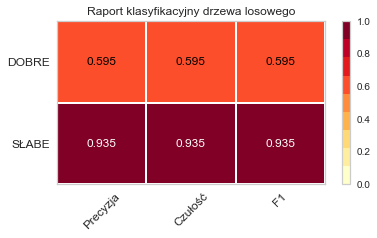

In [71]:
drzewo_raport_klasyfikacyjny()

Jeżeli klasy nie są zrównoważone wtedy na podstawie krzywej ROC  można wyciągnąć nadmiernie optymistyczne wnioski. 
Dlatego stosowany jest inny sposób oceniania klasyfikatora polegające na wykreśleniu krzywej Precision- Recall curve. 
Klasyfikacja to zrównoważony proces wyszukiwania potrzebnych danych (czułość) przy jednoczesnym ograniczeniu błędnych wyników (precyzja). 
Zazwyczaj trzeba znaleźć kompromis między tymi pojęciami. Im większa czułość tym mniejsza precyzja i odwrotnie.

In [72]:
def prezycja_czulosc_drzewo():
    from yellowbrick.classifier import ( PrecisionRecallCurve,)
    fig, ax = plt.subplots (figsize=(6, 4))
    viz = PrecisionRecallCurve (DecisionTreeClassifier (max_depth=3))

    viz. fit (X_train, y_train)
    print(viz.score (X_test, y_test)) 
    viz.ax.set(title="Krzywa precyzja-czułość klasyfikatora drzewa",xlabel="Czułość", ylabel="Precyzja") 
    ax.legend (("Binarna krzywa precyzja-czułość","Średnia precyzja = {:0.2f}".format (viz.score(X_test,y_test))),frameon=True, loc="lower left") 

0.5077767514532168


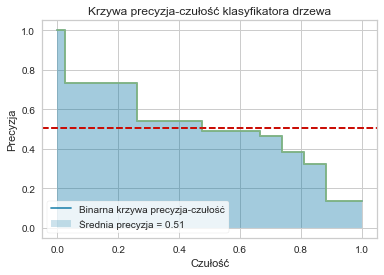

In [73]:
prezycja_czulosc_drzewo()

In [74]:
def wykres_rownowaga_klas_drzewo():
# Równowaga class

# Wykres ilustruje wielkość klas, jeżeli klasy różnią się wielkością wtedy dokładność nie jest odpowiednim wskaźnikiem jakości modelu.  
# Aby zachować właściwe proporcje między klasami danych należy przydzieleniu ich na zbiory treningowy i testowy stosować losowanie warstwowe (parametr stratify)
    from yellowbrick.classifier import ClassBalance
    fig, ax = plt.subplots (figsize=(6,6))

    cb_viz=ClassBalance (labels =["Słabsze", "Lepsze"])
    cb_viz.fit(y_test)

    ax.set_xticks (np.arange(len(cb_viz.labels))) 
    ax.set_xticklabels (cb_viz.labels) 
    ax.set(title="Równowaga klas dla (:,) próbek".format(cb_viz.support_.sum()), ylabel="Liczba próbek")
# Na wykresie uzyskano nierównowagę klas

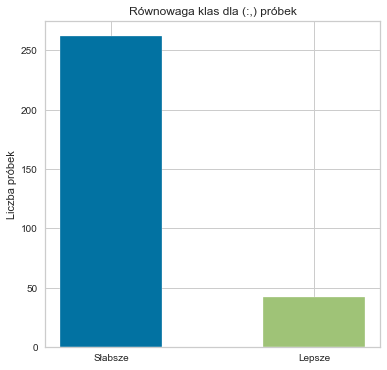

In [75]:
wykres_rownowaga_klas_drzewo()

In [76]:
def wykres_blad_prognozowania_klas():
# Błąd prognozowania klas
# wykres błędu prognozowania klas ilustrujący tablicę pomyłek. 

    from yellowbrick.classifier import (ClassPredictionError,)

    fig, ax = plt.subplots (figsize=(6, 3)) 
    cpe_viz = ClassPredictionError(dt, classes=["Słabsze", "Lepsze"])
    cpe_viz.score (X_test, y_test)
    ax.set_xticks (np.arange(len(cpe_viz.classes))) 
    ax.set_xticklabels (cpe_viz.classes)
    ax.set(title="Błąd prognozowania klas dla klasyfikatora drzewa losowego", xlabel="Klasa rzeczywista", ylabel="Klasa prognozowana")

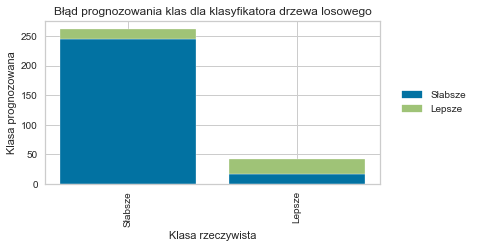

In [77]:
wykres_blad_prognozowania_klas()

In [78]:
def wykres_analiza_lime_drzewo():
# Analiza LIME  pokazująca, jak poszczególne cechy próbki przesuwają wyniki prognozy w prawo (wybór lepszego gatunku) lub w lewo (słabego gatunku)
# Poniżej przedstawiony jest kod umożliwiający interpretację ostatniej próbki danych ze zbioru treningowego, dla której nasz model drzewa decyzyjnego prognozuje wybór lepszego gatunku:

    from lime import lime_tabular 
    explainer = lime_tabular. LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=["słabsze", "lepsze"])
    exp = explainer.explain_instance( X_train.iloc[-1].values, dt.predict_proba)
# Danymi wejściowymi dla pakietu LIME nie może być struktura DataFrame. Zwróć uwagę, że jest ona zamieniana na tablicę numpy za pomocą atrybutu .values.
    fig = exp.as_pyplot_figure() 
    fig.tight_layout()
    fig.gca().set (title="Lokalna interpretacja klasy '%s'" % exp.class_names [1])

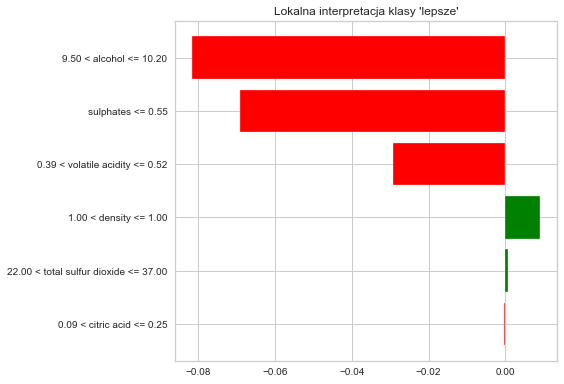

In [79]:
wykres_analiza_lime_drzewo()

In [80]:
ypred = dt.predict(X_test)
ypred
roc_auc_score(y_test, ypred)

0.7651762995274446

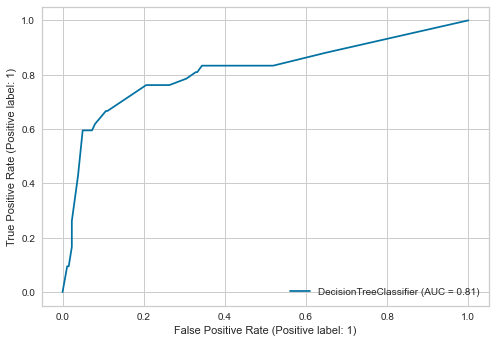

In [81]:
plot_roc_curve(dt, X_test, y_test)

In [82]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor ='white', s = 70)
    plt.plot(X, model.predict(X),color='black', lw=2)
    return None

In [83]:
def wykres_regresji_przy_uzyciu_drzewa():
# Wykres regresji przy użyciu drzewa
    X_sul=df[['sulphates']].values 
    y_q=df['alcohol'].values
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X_sul, y_q)
    sort_idx= X_sul. flatten().argsort()
    lin_regplot (X_sul[sort_idx], y_q[sort_idx], tree) 
    plt.xlabel('Nieliniowy związek zmiennych [sulphates i alkohol]-trend kształtujący dane') 
    plt.ylabel('Zawartość alkoholu')

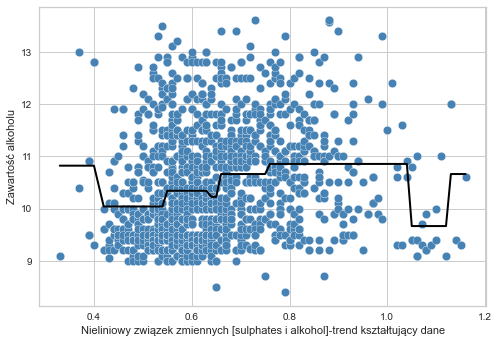

In [84]:
wykres_regresji_przy_uzyciu_drzewa()

<a id='MODEL4_RANDOM_FOREST'></a>
## 4.3. MODEL RANDOM FOREST

In [85]:
#Tworzę pierwszy model
rfc=RandomForestClassifier(criterion='gini',n_estimators=100,random_state=42,bootstrap=True,max_depth=None,min_samples_split=2)
rfc.fit(X_train, y_train)

yPred=rfc.predict(X_train)
yPred_test=rfc.predict(X_test)

In [86]:
#Ocena jakości modelu
score = rfc.score(X_test,y_test)
print("The score is {}".format(score))
  
prec = precision_score(y_test, yPred_test)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, yPred_test)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, yPred_test)
print("The F1-Score is {}".format(f1))

The score is 0.9144736842105263
The precision is 0.7105263157894737
The recall is 0.6428571428571429
The F1-Score is 0.6749999999999999


In [87]:
CR_model1=classification_report( y_test,yPred_test,target_names=["słabe", "dobre"])
print(CR_model1)

              precision    recall  f1-score   support

       słabe       0.94      0.96      0.95       262
       dobre       0.71      0.64      0.67        42

    accuracy                           0.91       304
   macro avg       0.83      0.80      0.81       304
weighted avg       0.91      0.91      0.91       304



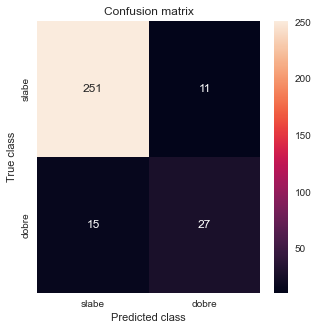

In [88]:
#Confusion Matrix
LABELS = ['słabe', 'dobre']
conf_matrix = confusion_matrix(y_test, yPred_test)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [89]:
def raport_las():
# Raport klasyfikacyjny prezentujący precyzję, czułośc, wskaźnik F1 dla wyników pozytywnych i negatywnych. 
# Im dany wskaźnik jest lepszy -bliższy jedności -tym komórka jest bardziej czerwona
    from yellowbrick.classifier import (ClassificationReport,)
    fig, ax = plt.subplots (figsize=(6, 3))
    cm_viz = ClassificationReport( rfc,classes=["SŁABE", "DOBRE"], label_encoder=mapping)

    cm_viz.score (X_test, y_test) 
    cm_viz.ax.set (title="Raport klasyfikacyjny lasu losowego")
    xlabels = ("Precyzja", "Czułość", "F1")
    ax.set_xticks (np.arange(len(xlabels)) + 0.5) 
    ax.set_xticklabels (xlabels, rotation=45)
    ax.set_yticks (np.arange(len(cm_viz.classes)) + 0.5) 
    ax.set_yticklabels (cm_viz.classes) 

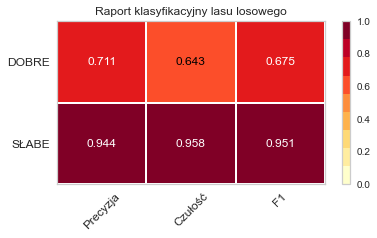

In [90]:
raport_las()

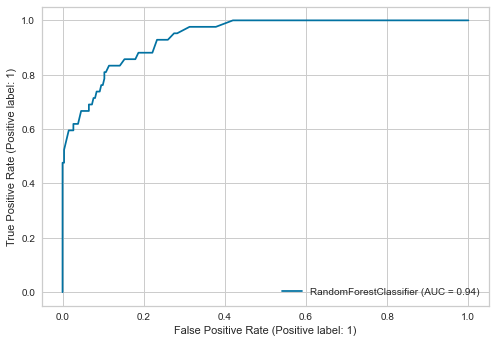

In [91]:
#ROC_RF = plot_roc_curve(rfc, X_test, y_test)
#plt.show()
RocCurveDisplay.from_estimator(rfc, X_test, y_test);

#### Walidacja krzyżowa (kroswalidacja)

In [92]:
cv_results=cross_val_score(rfc,X_train,y_train,cv=5)
print(cv_results)
print(f'Scores: {np.round(cv_results,2)}')
print(f'Scores mean: {np.round(np.mean(cv_results),3)}')

[0.89300412 0.90123457 0.90909091 0.90495868 0.89669421]
Scores: [0.89 0.9  0.91 0.9  0.9 ]
Scores mean: 0.901


#### Wybór optymalnych hiperparametrów - Grid Search

In [93]:
params={'criterion': ['gini','entropy'],
        'n_estimators': [100,200,50,20],
        'max_depth': [2,4,5,10,None],
        'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 25],
        'max_features':['sqrt','log2',None]
        }

In [94]:
grid_search_rfc = GridSearchCV(rfc, param_grid=params, cv=5, scoring='recall',n_jobs=-1,verbose=1)

grid_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 25],
                         'n_estimators': [100, 200, 50, 20]},
             scoring='recall', verbose=1)

In [95]:
print(grid_search_rfc.best_score_)
print(grid_search_rfc.score(X = X_test, y = y_test))
print(grid_search_rfc.best_params_)

0.5361853832442067
0.6428571428571429
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 200}


#### Zbiór jest mocno niezrównoważony.
W celu zrównoważenia danych używam oversamplingu ( metoda SMOTE).
Tworzę model z parametrem sampling_strategy=0.75

In [96]:
from imblearn.over_sampling import SMOTE

sm2 = SMOTE(sampling_strategy=0.75,random_state=42)
X_res2, y_res2 = sm2.fit_resample(X_train, y_train)

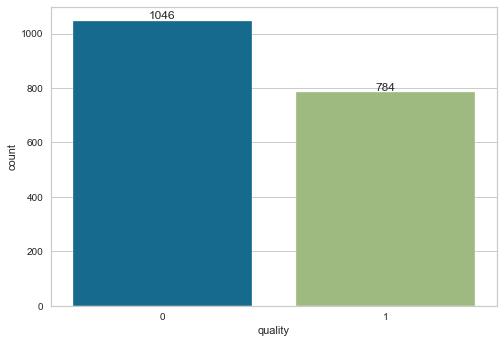

In [97]:
ax = sns.countplot(x=y_res2)
abs_values = y_res2.value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values);

In [98]:
# Buduję model na danych poddanych oversamplingowi.
rfc_over2=RandomForestClassifier(n_estimators=100,random_state=42,bootstrap=True,max_depth=None,min_samples_split=2)
rfc_over2.fit(X_res2, y_res2)
yPred_over2=rfc_over2.predict(X_test)


print(classification_report(y_test, yPred_over2,target_names=["słabe", "dobre"]))


              precision    recall  f1-score   support

       słabe       0.96      0.90      0.93       262
       dobre       0.56      0.79      0.65        42

    accuracy                           0.88       304
   macro avg       0.76      0.84      0.79       304
weighted avg       0.91      0.88      0.89       304



In [99]:
# Ocena jakości modelu
score_over2 = rfc_over2.score(X_test, y_test)
print("The score is {}".format(score_over2))
prec_over_rfc2 = precision_score(y_test, yPred_over2)
print("The precision is {}".format(prec_over_rfc2))
rec_over_rfc2 = recall_score(y_test, yPred_over2)
print("The recall is {}".format(rec_over_rfc2))
f1_over_rfc2 = f1_score(y_test, yPred_over2)
print("The F1-Score is {}".format(f1_over_rfc2))

The score is 0.8848684210526315
The precision is 0.559322033898305
The recall is 0.7857142857142857
The F1-Score is 0.6534653465346535


In [100]:
def confusion_matrix_las_po_oversamplingu():
#Confusion Matrix

    LABELS = ['słabe', 'dobre']
    conf_matrix = confusion_matrix(y_test, yPred_over2)
    plt.figure(figsize =(5, 5))
    sns.heatmap(conf_matrix, xticklabels = LABELS, 
                yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

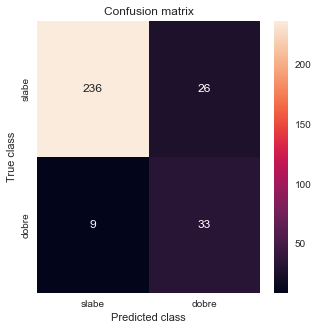

In [101]:
confusion_matrix_las_po_oversamplingu()

In [102]:
def las_po_oversamplingu():
# Raport klasyfikacyjny prezentujący precyzję, czułośc, wskaźnik F1 dla wyników pozytywnych i negatywnych. 
# Im dany wskaźnik jest lepszy -bliższy jedności -tym komórka jest bardziej czerwona
    from yellowbrick.classifier import (ClassificationReport,)
    fig, ax = plt.subplots (figsize=(6, 3))
    cm_viz = ClassificationReport( rfc_over2,classes=["SŁABE", "DOBRE"], label_encoder=mapping)

    cm_viz.score (X_test, y_test) 
    cm_viz.ax.set (title="Raport klasyfikacyjny drzewa losowego")
    xlabels = ("Precyzja", "Czułość", "F1")
    ax.set_xticks (np.arange(len(xlabels)) + 0.5) 
    ax.set_xticklabels (xlabels, rotation=45)
    ax.set_yticks (np.arange(len(cm_viz.classes)) + 0.5) 
    ax.set_yticklabels (cm_viz.classes)

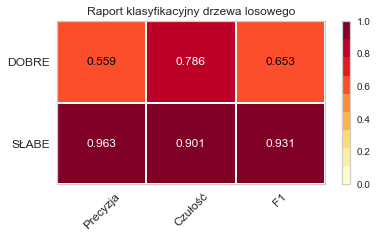

In [103]:
las_po_oversamplingu()

In [104]:
# Ważność cech
import pandas as pd
feature_imp = pd.Series(rfc_over2.feature_importances_, index=df.columns[:6]).sort_values(ascending=False)
feature_imp

alcohol                 0.284751
sulphates               0.202240
volatile acidity        0.147811
total sulfur dioxide    0.134071
citric acid             0.122991
density                 0.108136
dtype: float64

In [105]:
%matplotlib inline
import seaborn as sns
def waznosc_Cech_las_po_ovesamplingu():
    sns.barplot(x=feature_imp, y=feature_imp.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    #plt.legend()
    plt.show()

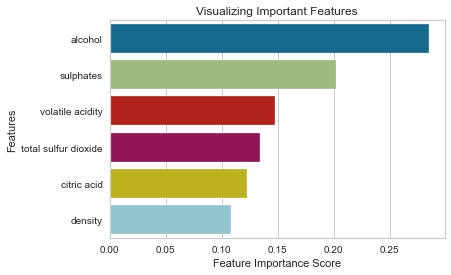

In [106]:
waznosc_Cech_las_po_ovesamplingu()

In [107]:
cv_results_over=cross_val_score(rfc_over2,X_res2,y_res2,cv=5,scoring="recall")
print(cv_results_over)

[0.81410256 0.96178344 0.89171975 0.94267516 0.94267516]


In [108]:
def wykres_blad_prognozowania_klas_las():
    from yellowbrick.classifier import (ClassPredictionError,)

    fig, ax = plt.subplots (figsize=(6, 3)) 
    cpe_viz = ClassPredictionError(rfc_over2, classes=["Słabsze", "Lepsze"])
    cpe_viz.score (X_test, y_test)
    ax.set_xticks (np.arange(len(cpe_viz.classes))) 
    ax.set_xticklabels (cpe_viz.classes)
    ax.set(title="Błąd prognozowania klas dla klasyfikatora lasu losowego", xlabel="Klasa rzeczywista", ylabel="Klasa prognozowana")

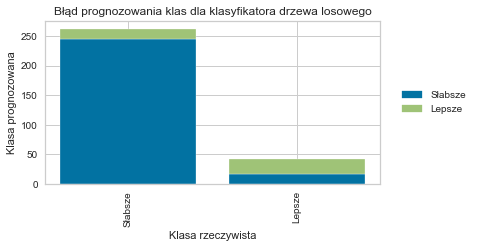

In [109]:
wykres_blad_prognozowania_klas()

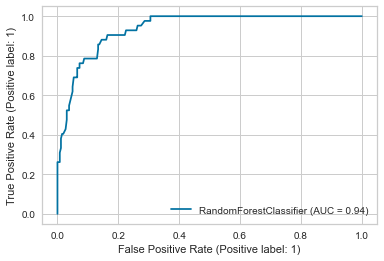

In [110]:
RocCurveDisplay.from_estimator(rfc_over2, X_test, y_test);

In [111]:
def wykres_analiza_lime_las():
# Analiza LIME  pokazująca, jak poszczególne cechy próbki przesuwają wyniki prognozy w prawo (wybór lepszego gatunku) lub w lewo (słabego gatunku)
# Poniżej przedstawiony jest kod umożliwiający interpretację ostatniej próbki danych ze zbioru treningowego, dla której nasz model drzewa decyzyjnego prognozuje wybór lepszego gatunku:

    from lime import lime_tabular 
    explainer = lime_tabular. LimeTabularExplainer(X_res2.values, feature_names=X.columns, class_names=["słabsze", "lepsze"])
    exp = explainer.explain_instance( X_res2.iloc[-1].values, rfc_over2.predict_proba)
# Danymi wejściowymi dla pakietu LIME nie może być struktura DataFrame. Zwróć uwagę, że jest ona zamieniana na tablicę numpy za pomocą atrybutu .values.
    fig = exp.as_pyplot_figure() 
    fig.tight_layout()
    fig.gca().set (title="Lokalna interpretacja klasy '%s'" % exp.class_names [1])

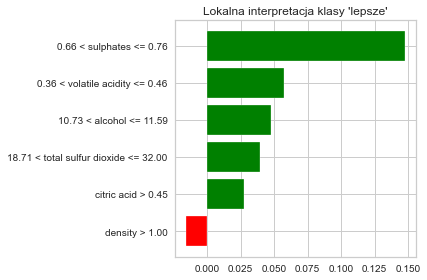

In [112]:
wykres_analiza_lime_las()

In [113]:
y_pred_proba = rfc_over2.predict_proba(X_test)[:,1]

In [114]:
recall = []
x = np.arange(0,1, 0.05)
for i in x:    
    decisions = (y_pred_proba >= i).astype(int)
    recall.append([i, recall_score(y_test, decisions)])
recall

[[0.0, 1.0],
 [0.05, 1.0],
 [0.1, 1.0],
 [0.15000000000000002, 0.9523809523809523],
 [0.2, 0.9285714285714286],
 [0.25, 0.9047619047619048],
 [0.30000000000000004, 0.8809523809523809],
 [0.35000000000000003, 0.8571428571428571],
 [0.4, 0.7857142857142857],
 [0.45, 0.7857142857142857],
 [0.5, 0.7857142857142857],
 [0.55, 0.7857142857142857],
 [0.6000000000000001, 0.7619047619047619],
 [0.65, 0.7380952380952381],
 [0.7000000000000001, 0.6904761904761905],
 [0.75, 0.5952380952380952],
 [0.8, 0.5238095238095238],
 [0.8500000000000001, 0.38095238095238093],
 [0.9, 0.30952380952380953],
 [0.9500000000000001, 0.14285714285714285]]

In [115]:
# Wpływ poziomu cut-off na recall.
cut_off = []
acc = []
for k in recall:
    cut_off.append(k[0])
    acc.append(k[1])

In [116]:
x = np.arange(0.05,1, 0.05)
for i in x:    
    decisions = (y_pred_proba >= i).astype(int)
    print('Cut-off:', np.round(i,decimals=2), '||','Recall:', np.round(recall_score(y_test, decisions), decimals=5))
    print('='*30)

Cut-off: 0.05 || Recall: 1.0
Cut-off: 0.1 || Recall: 1.0
Cut-off: 0.15 || Recall: 0.95238
Cut-off: 0.2 || Recall: 0.92857
Cut-off: 0.25 || Recall: 0.90476
Cut-off: 0.3 || Recall: 0.88095
Cut-off: 0.35 || Recall: 0.85714
Cut-off: 0.4 || Recall: 0.78571
Cut-off: 0.45 || Recall: 0.78571
Cut-off: 0.5 || Recall: 0.78571
Cut-off: 0.55 || Recall: 0.78571
Cut-off: 0.6 || Recall: 0.7619
Cut-off: 0.65 || Recall: 0.69048
Cut-off: 0.7 || Recall: 0.69048
Cut-off: 0.75 || Recall: 0.59524
Cut-off: 0.8 || Recall: 0.52381
Cut-off: 0.85 || Recall: 0.38095
Cut-off: 0.9 || Recall: 0.28571
Cut-off: 0.95 || Recall: 0.14286


#### Wybór optymalnych hiperparametrów - Grid Search

In [117]:
params={'criterion': ['gini','entropy'],
        'n_estimators': [100,200,50,20],
        'max_depth': [2,4,5,10,None],
        'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 25],
        'max_features':['sqrt','log2',None]
        }

In [118]:
grid_search_over = GridSearchCV(rfc_over2, param_grid=params, cv=5, scoring='recall', n_jobs=-1,verbose=1)

grid_search_over.fit(X_res2, y_res2)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 25],
                         'n_estimators': [100, 200, 50, 20]},
             scoring='recall', verbose=1)

In [119]:
print(grid_search_over.best_score_)
print(grid_search_over.score(X = X_test, y = y_test))
print(grid_search_over.best_params_)

0.9233382328923729
0.7857142857142857
{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 50}


<a id='MODEL5_XGBOOST'></a>
## 4.4. MODEL XGBOOST

In [120]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=5, use_label_encoder=False, eval_metric='error')
xgb_model.fit(X_train, y_train)
xgb_model.score (X_test, y_test) 

0.9177631578947368

In [121]:
xgb_model.predict_proba (X.iloc[[0]])

array([[9.999390e-01, 6.098256e-05]], dtype=float32)

In [122]:
# Walidacja
xgb_model_cv_results = cross_val_score(xgb_model,X, y,cv=5)  #ilokrotność walidacji cv(razy: trening na 4, testowanie na jednej | dzięki wielu podziałom można zobczyć jak radzi sobie z danymi
print(f'Scores: {np.round(xgb_model_cv_results,3)}')

Scores: [0.895 0.838 0.884 0.851 0.865]


In [123]:
print(f'Scores mean: {np.round(np.mean(xgb_model_cv_results),3)}') #liczę średnią ze scorów z kroswalidacji, wynik zbliżony z wynikiem score

Scores mean: 0.867


In [124]:
xgb_model.score( X_test,y_test)

0.9177631578947368

In [125]:
# Poniżej przedstawiony jest kod wizualizujący ważności cech Giniego (dzięki nim można zmniejszyć błąd modelu):

for col, val in sorted(zip (X.columns, xgb_model.feature_importances_),
key=lambda x: x[1], reverse=True,
)[:5]:
    print(f" {col:10} {val: 10.3f}") 

 alcohol         0.290
 sulphates       0.210
 total sulfur dioxide      0.136
 volatile acidity      0.131
 citric acid      0.120


In [126]:
# Wykres ważności cech w odniesieniu do największej bezwzględnej wartości współczynnika regresji. Użyta do tej funkcja wizualizuj sama argument relative= True który powoduje że największej wartość jest przypisywana liczba 
# 100 lub minus 100 a pozostałem wartością proporcjonalnie mniejsze liczby. 
from yellowbrick.model_selection import FeatureImportances
def wykres_waznosci_Cech_XGBoost():
    fig, ax = plt.subplots (figsize=(6, 4))
    fi_viz = FeatureImportances (xgb_model)
    fi_viz.fit(X, y)
    fi_viz.ax.set(title="Ważność 6 cech (XGBoost)", xlabel = "Względna ważność")

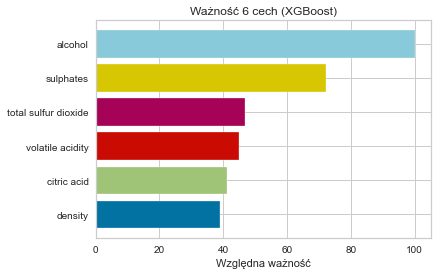

In [127]:
wykres_waznosci_Cech_XGBoost()

In [128]:
from sklearn.metrics import accuracy_score
xgb_model_prediction_tr = xgb_model.predict(X_train)
xgb_model_prediction_ts = xgb_model.predict(X_test)
print(sklearn.metrics.classification_report(y_test, prediction_ts, target_names=["słabe", "dobre"]))

              precision    recall  f1-score   support

       słabe       0.94      0.94      0.94       262
       dobre       0.60      0.60      0.60        42

    accuracy                           0.89       304
   macro avg       0.77      0.77      0.77       304
weighted avg       0.89      0.89      0.89       304



In [129]:
print('accuracy train data is',accuracy_score(y_train,xgb_model_prediction_tr))
print('accuracy test data is',accuracy_score(y_test,xgb_model_prediction_ts))

accuracy train data is 1.0
accuracy test data is 0.9177631578947368


In [130]:
print('recall train data is',recall_score(y_train,xgb_model_prediction_tr,average="macro"))
print('recall test data is',recall_score(y_test,xgb_model_prediction_ts,average="macro"))

recall train data is 1.0
recall test data is 0.8123409669211196


In [131]:
# get confusion matrix
xgb_model_predictions = xgb_model.predict(X_test)
xgb_model_matrix = sklearn.metrics.confusion_matrix(y_test, xgb_model_predictions)
xgb_model_matrix

array([[251,  11],
       [ 14,  28]], dtype=int64)

In [132]:
sklearn.metrics.f1_score(y_test, xgb_model_predictions, average="micro")

0.9177631578947368

[Text(0.5, 1.0, 'Tablica pomyłek klasyfikatora XGBoost '),
 Text(0.5, 0, 'Klasa prognozowana'),
 Text(0, 0.5, 'Klasa rzeczywista')]

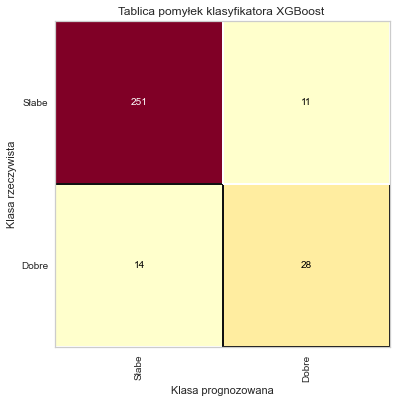

In [133]:
from yellowbrick.classifier import (ConfusionMatrix,)
mapping = {0: "Słabe", 1: "Dobre"} 
fig, ax = plt.subplots (figsize=(6, 6)) 
cm_viz = ConfusionMatrix(xgb_model,classes=["Słabe", "Dobre"], label_encoder=mapping,) 
cm_viz.score (X_test, y_test) 
cm_viz.ax.set(title="Tablica pomyłek klasyfikatora XGBoost ", xlabel="Klasa prognozowana", ylabel="Klasa rzeczywista")
# Ćwiartki lewa górna i prawa dolna zawierają poprawne wyniki klasyfikacji, a lewa dolna i prawa górna -błędne; ćwiartka lewa dolna zawiera wyniki fałszywie negatywne 
# a prawa górna - fałszywie pozytywne.  Centrum dobrego klasyfikatora są duże wartości prawdziwych wyników na przekątnej tabeli

In [134]:
def raport_XGBoost():
# Raport klasyfikacyjny prezentujący precyzję, czułośc, wskaźnik F1 dla wyników pozytywnych i negatywnych. 
# Im dany wskaźnik jest lepszy -bliższy jedności -tym komórka jest bardziej czerwona
    from yellowbrick.classifier import (ClassificationReport,)
    fig, ax = plt.subplots (figsize=(6, 3))
    xgb_model_cm_viz = ClassificationReport( xgb_model,classes=["SŁABE", "DOBRE"], label_encoder=mapping)

    xgb_model_cm_viz.score (X_test, y_test) 
    xgb_model_cm_viz.ax.set (title="Raport klasyfikacyjny drzewa losowego")
    xlabels = ("Precyzja", "Czułość", "F1")
    ax.set_xticks (np.arange(len(xlabels)) + 0.5) 
    ax.set_xticklabels (xlabels, rotation=45)
    ax.set_yticks (np.arange(len(xgb_model_cm_viz.classes)) + 0.5) 
    ax.set_yticklabels (xgb_model_cm_viz.classes) 

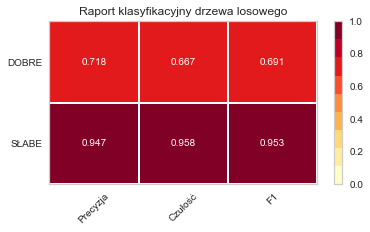

In [135]:
raport_XGBoost()

In [136]:
def prezycja_czulosc_xgboost():
    from yellowbrick.classifier import ( PrecisionRecallCurve,)
    fig, ax = plt.subplots (figsize=(6, 4))
    xgb_model_viz = PrecisionRecallCurve (xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=5, use_label_encoder=False, eval_metric='error'))

    xgb_model_viz. fit (X_train, y_train)
    print(xgb_model_viz.score (X_test, y_test)) 
    xgb_model_viz.ax.set(title="Krzywa precyzja-czułość klasyfikatora",xlabel="Czułość", ylabel="Precyzja") 
    ax.legend (("Binarna krzywa precyzja-czułość","Średnia precyzja = {:0.2f}".format (xgb_model_viz.score(X_test,y_test))),frameon=True, loc="lower left") 

0.7624161858790544


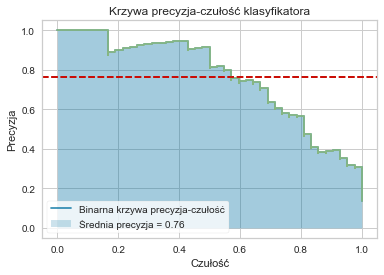

In [137]:
prezycja_czulosc_xgboost()

In [138]:
def rownowaga_klas_xgboost():
    from yellowbrick.classifier import ClassBalance
    fig, ax = plt.subplots (figsize=(6,6))

    xgb_model_cb_viz=ClassBalance (labels =["Słabsze", "Lepsze"])
    xgb_model_cb_viz.fit(y_test)

    ax.set_xticks (np.arange(len(xgb_model_cb_viz.labels))) 
    ax.set_xticklabels (xgb_model_cb_viz.labels) 
    ax.set(title="Równowaga klas dla (:,) próbek".format(xgb_model_cb_viz.support_.sum()), ylabel="Liczba próbek")

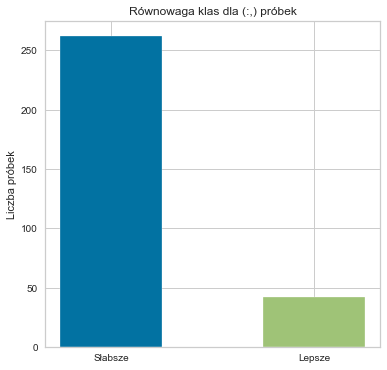

In [139]:
rownowaga_klas_xgboost()

In [140]:
def wykres_blad_prognozaowania_klas_XGboost():
# Błąd prognozowania klas
# wykres błędu prognozowania klas ilustrujący tablicę pomyłek. 

    from yellowbrick.classifier import (ClassPredictionError,)

    fig, ax = plt.subplots (figsize=(6, 3)) 
    xgb_model_cpe_viz = ClassPredictionError(xgb_model, classes=["Słabsze", "Lepsze"])
    xgb_model_cpe_viz.score (X_test, y_test)
    ax.set_xticks (np.arange(len(xgb_model_cpe_viz.classes))) 
    ax.set_xticklabels (xgb_model_cpe_viz.classes)
    ax.set(title="Błąd prognozowania klas dla klasyfikatora drzewa losowego", xlabel="Klasa rzeczywista", ylabel="Klasa prognozowana")

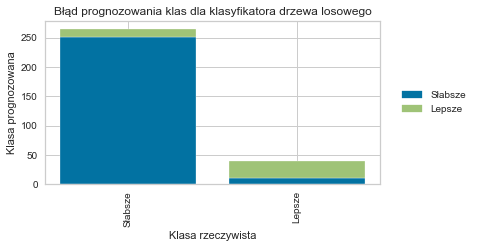

In [141]:
wykres_blad_prognozaowania_klas_XGboost()

In [142]:
def wykres_lime_xgboost():
    from lime import lime_tabular 
    xgb_model_explainer = lime_tabular. LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=["słabsze", "lepsze"])
    xgb_model_exp = xgb_model_explainer.explain_instance( X_train.iloc[-1].values, xgb_model.predict_proba)
    xgb_model_fig = xgb_model_exp.as_pyplot_figure() 
    xgb_model_fig.tight_layout()
    xgb_model_fig.gca().set (title="Lokalna interpretacja klasy '%s'" % xgb_model_exp.class_names [1])

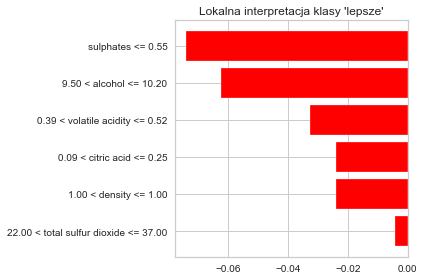

In [143]:
wykres_lime_xgboost()

In [144]:
xgb_model_ypred = xgb_model.predict(X_test)
xgb_model_ypred
roc_auc_score(y_test, xgb_model_ypred)

0.8123409669211196

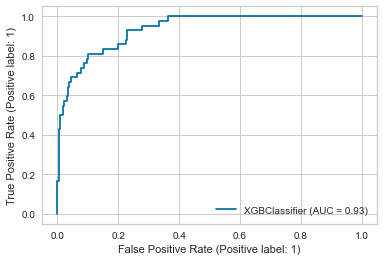

In [145]:
plot_roc_curve(xgb_model, X_test, y_test)

In [146]:
def wykres_nieliniowy_Zwiazek_XgBoost():
    xgb_reg_model_X_sul=df[['sulphates']].values 
    xgb_reg_model_y_q=df['alcohol'].values
    xgb_reg_model = xgb.XGBRegressor(random_state=123, n_estimators=5, max_depth=7)
    xgb_reg_model.fit(xgb_reg_model_X_sul, xgb_reg_model_y_q)
    xgb_reg_model_sort_idx= xgb_reg_model_X_sul. flatten().argsort()
    lin_regplot (xgb_reg_model_X_sul[xgb_reg_model_sort_idx], xgb_reg_model_y_q[xgb_reg_model_sort_idx], xgb_reg_model) 
    plt.xlabel('Nieliniowy związek zmiennych [sulphates i alkohol]-trend kształtujący dane') 
    plt.ylabel('Zawartość alkoholu')

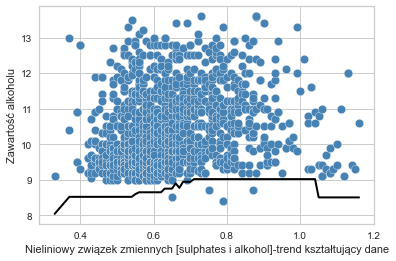

In [147]:
wykres_nieliniowy_Zwiazek_XgBoost()

<a id='KMEANS'></a>
## 4.5. KMEANS

In [148]:
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [149]:
wine_df = df.drop('quality', axis=1)
wine_df.columns

Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

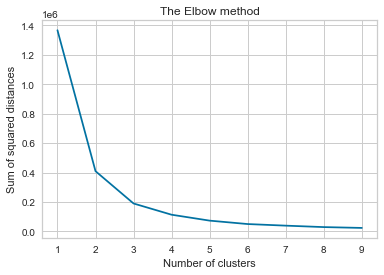

In [150]:
wss=[]                        # poszukiwanie ilości klastrów
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(wine_df)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

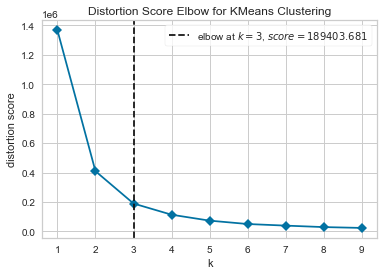

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [151]:
from yellowbrick.cluster import KElbowVisualizer # potwierdzenie rezultatu wyboru ilości klastrów
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(wine_df)
visualizer.show()

In [152]:
for i in range(2,10):                                 # poszukiwanie ilości klastrów metodą silhoutte
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(wine_df)
    score = silhouette_score(wine_df, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))

For cluster: 2, the silhouette score is: 0.6480985477659772
For cluster: 3, the silhouette score is: 0.5912560884049005
For cluster: 4, the silhouette score is: 0.5729940218109418
For cluster: 5, the silhouette score is: 0.5580193941620687
For cluster: 6, the silhouette score is: 0.5407020159248668
For cluster: 7, the silhouette score is: 0.5274062261734523
For cluster: 8, the silhouette score is: 0.5238778544253215
For cluster: 9, the silhouette score is: 0.5221995356487595


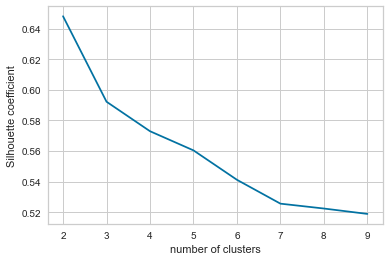

In [153]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(wine_df)
    score = silhouette_score(wine_df, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

In [154]:
pca = PCA()
X = pca.fit_transform(wine_df)

In [155]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

<function matplotlib.pyplot.show(close=None, block=None)>

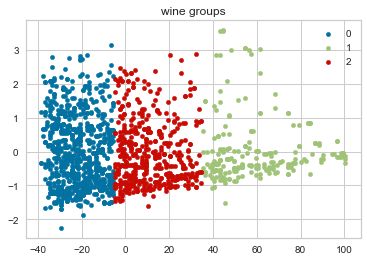

In [156]:
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('wine groups')
plt.show

<a id='PORÓWNANIE_MODELI'></a>
# 5. PORÓWNANIE MODELI

### Porównanie metryk stworzonych modeli - na zbiorze testowym
Wszystkie modele zostały przetestowane cross_val_score, natomiast parametry zostały wybrane za pomocą GridSearchCV.   
Metryką, która była dla nas najbardziej istotna jest Recall, która jest intuicyjnie zdolnością klasyfikatora do znalezienia wszystkich pozytywnych próbek. 
Poniżej tabelka z porównaniem metryk dla modeli.

In [157]:
def compare_models():
    compare_models=pd.DataFrame({"Model":["Regresja logistyczna","Drzewo decyzyjne","Las losowy","Las losowy po oversamplingu","XGBoost" ],
                    "Recall":[recall_score(y_test, pred_test),recall_score(y_test,prediction_ts),recall_score(y_test, yPred_test),recall_score(y_test, yPred_over2),recall_score(y_test,xgb_model_prediction_ts)],
                    "F1":[f1_score(y_test, pred_test),f1_score(y_test,prediction_ts),f1_score(y_test, yPred_test),f1_score(y_test, yPred_over2),f1_score(y_test,xgb_model_prediction_ts)],            
                     "Precision":[precision_score(y_test, pred_test),precision_score(y_test,prediction_ts),precision_score(y_test, yPred_test),precision_score(y_test, yPred_over2),precision_score(y_test,xgb_model_prediction_ts)]
                    })
    return compare_models

In [158]:
compare_models()

Model    Recall        F1  Precision
0         Regresja logistyczna  0.595238  0.632911   0.675676
1             Drzewo decyzyjne  0.595238  0.595238   0.595238
2                   Las losowy  0.642857  0.675000   0.710526
3  Las losowy po oversamplingu  0.785714  0.653465   0.559322
4                      XGBoost  0.666667  0.691358   0.717949

### Ocena jakosci modeli (StratifiedKFold)

In [159]:
# zdefiniowanie walidacji
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

models = [model_LR, dt, rfc,xgb_model]

In [160]:
def run_model(model, X, y, cross_val):
    """
    funkcja przeprowadzająca trening na liście modeli

    input:
            model: model estymatora z pakietu sklearn
            X: cechy do przeprowadzenia uczenia
            y: target
            cross_val: rodzaj walidacji
    output/print:
            fbeta_res: wynik fbeta na każdy fold / później uśredniony
            accuracy_res: wynik accuracy na każdy fold / później uśredniony
            cross_val_time: total scoring time dla obu metryk
    """
    model_name = type(model).__name__

    fbeta_scorer = make_scorer(fbeta_score, beta=0.5)
    
    start = time()
    fbeta_res = cross_val_score(model, X, y, cv=cross_val, scoring=fbeta_scorer)
    accuracy_res = cross_val_score(model, X, y, cv=cross_val, scoring='accuracy')
    end = time()
    cross_val_time = end-start
    print("{} fbeta: {:.4f}, accuracy: {:.4f}, time: {}".format(model_name, np.mean(fbeta_res), np.mean(accuracy_res), cross_val_time))

In [161]:
# ewaluacja modeli
for model in models:
    run_model(model, X_train, y_train, skf)

LogisticRegression fbeta: 0.4574, accuracy: 0.8771, time: 0.20435810089111328
DecisionTreeClassifier fbeta: 0.5188, accuracy: 0.8729, time: 0.04686331748962402
RandomForestClassifier fbeta: 0.6261, accuracy: 0.8985, time: 1.8133580684661865
XGBClassifier fbeta: 0.5824, accuracy: 0.8870, time: 0.8598670959472656


### sprawdzenie na zbiorze testowym

In [162]:
# fit models
for model in models:
    model.fit(X_train, y_train)

In [163]:
# wyniki predykcji
y_pred_LR_model = model_LR.predict(X_test)
y_pred_DT_model = dt.predict(X_test)
y_pred_RF_model = rfc.predict(X_test)
y_pred_XGB_model = xgb_model.predict(X_test)


y_pred_LR_model,y_pred_DT_model,y_pred_RF_model,y_pred_XGB_model

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [164]:
# sprawdzenie fbeta_score dla każdego modelu między wynikami predykcji
# a rzeczywistymi wartościami ze zbioru treningowego
fbeta_LR = fbeta_score(y_test, y_pred_LR_model, beta=0.5)
fbeta_DT = fbeta_score(y_test, y_pred_DT_model, beta=0.5)
fbeta_RF = fbeta_score(y_test, y_pred_RF_model, beta=0.5)
fbeta_XGB = fbeta_score(y_test, y_pred_XGB_model, beta=0.5)

results = [fbeta_LR, fbeta_DT, fbeta_RF]
fbeta_LR, fbeta_DT, fbeta_RF

(0.6172839506172839, 0.5952380952380952, 0.6958762886597938)

In [165]:
print("-----Wyniki f-beta na zbiorze testowym-----")
print("Logistic Regression f-beta: {:.4f}".format(fbeta_LR))
print("Decision Tree f-beta: {:.4f}".format(fbeta_DT))
print("RandomForest f-beta: {:.4f}".format(fbeta_RF))
print("XGBoost f-beta: {:.4f}".format(fbeta_XGB))


-----Wyniki f-beta na zbiorze testowym-----
Logistic Regression f-beta: 0.6173
Decision Tree f-beta: 0.5952
RandomForest f-beta: 0.6959
XGBoost f-beta: 0.7071


#### Confusion matrix dla XGBoost

In [166]:
def confusion_matrix_model_the_best():
    cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_XGB_model)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()] #flatten() 'splaszcza' matryce

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    sns.set(rc={'figure.figsize':(8,6)})
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set(xlabel='Predicted', ylabel='Actual');

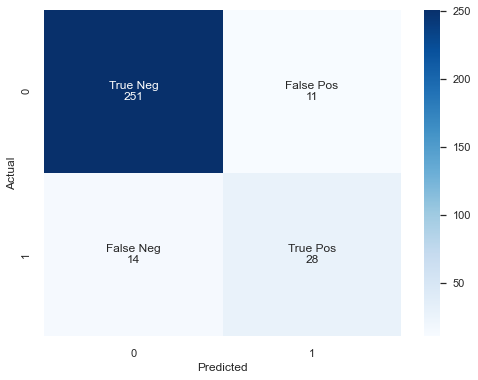

In [167]:
confusion_matrix_model_the_best()

#### wspólna krzywa ROC

In [168]:
def wykres_ROC_all():
#set up plotting area
    plt.figure(0).clf()
    from matplotlib.pyplot import figure

    figure(figsize=(12, 12), dpi=80)
#fit logistic regression model and plot ROC curve
# model = LogisticRegression()
    pred_test# = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_test)
    auc = round(metrics.roc_auc_score(y_test, pred_test), 4)
    plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
    #model = GradientBoostingClassifier()
    #model.fit(X_train, y_train)
    #y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, xgb_model_prediction_ts)
    auc = round(metrics.roc_auc_score(y_test, xgb_model_prediction_ts), 4)
    plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
    prediction_ts# = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, prediction_ts)
    auc = round(metrics.roc_auc_score(y_test, prediction_ts), 4)
    plt.plot(fpr,tpr,label="DecisionTree, AUC="+str(auc))

#fit random forest model and plot ROC curve
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
    yPred_test# = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, yPred_test)
    auc = round(metrics.roc_auc_score(y_test, yPred_test), 4)
    plt.plot(fpr,tpr,label="RandomForest, AUC="+str(auc))

#add legend
    plt.legend()

<Figure size 576x432 with 0 Axes>

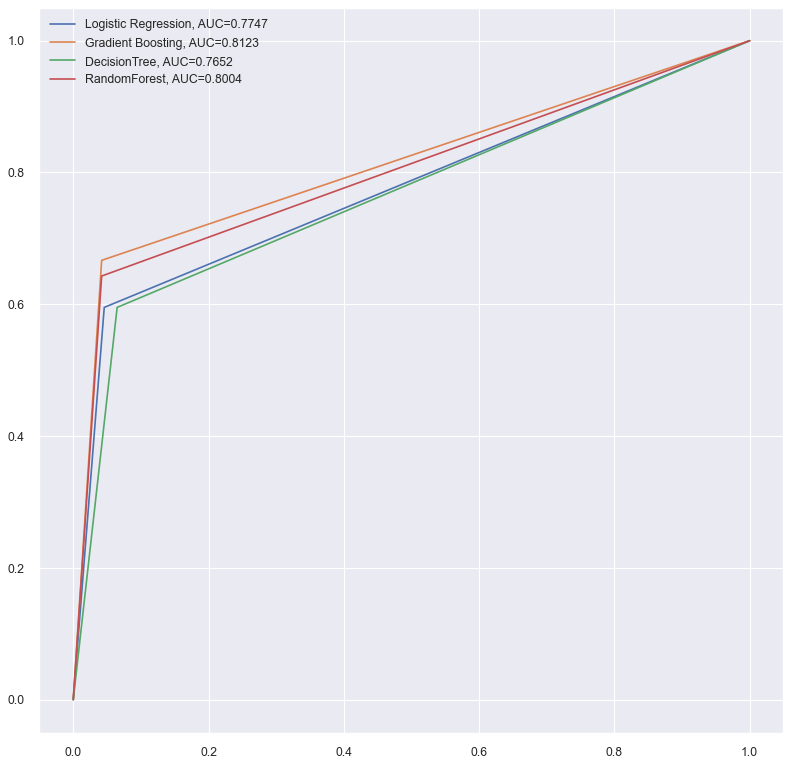

In [169]:
wykres_ROC_all();

#### Porównanie ważności cech między modelami drzewa,lasu losowego i XGBoost

In [239]:
def wykres_porownanie_waznosci_cech():
    from yellowbrick.model_selection import FeatureImportances
    plt.figure(figsize=(15,8))
    feats = get_quant_features(wine)
    # lewy wykres
    plt.subplot(2, 2, 1)
    fi_viz = FeatureImportances(dt, labels=feats)
    fi_viz.fit(X, y)
    fi_viz.ax.set(title="Drzewo decyzyjne")
    # prawy wykres
    plt.subplot(2, 2, 2)
    fi_viz1 = FeatureImportances (rfc, labels=feats)
    fi_viz1.fit(X, y)
    fi_viz1.ax.set(title="Las losowy")
    plt.subplot(2, 2, 3)
    fi_viz = FeatureImportances(xgb_model, labels=feats)
    fi_viz.fit(X, y)
    fi_viz.ax.set(title="XGBoost")
    plt.suptitle('Ważność 6 cech');

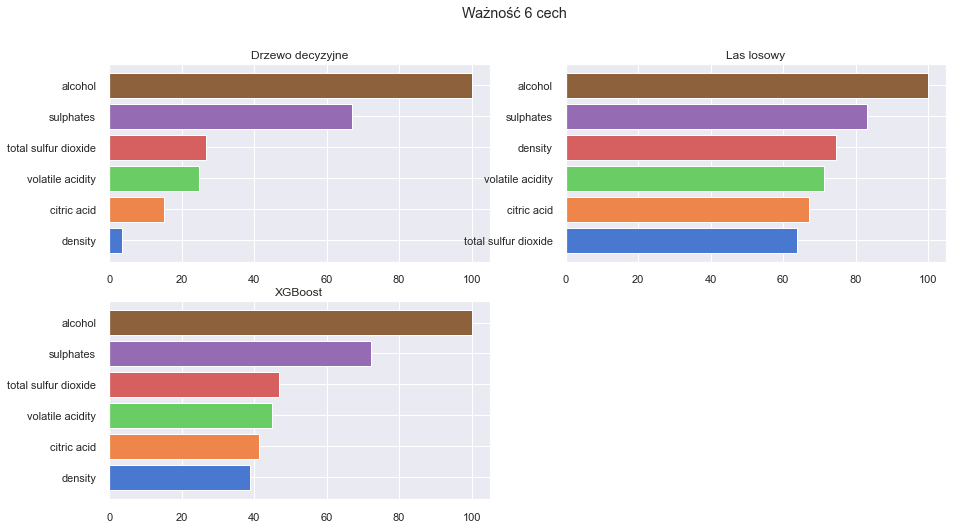

In [238]:
wykres_porownanie_waznosci_cech()

In [226]:
def waznosc_RF():
    feature_imp_RF = pd.Series(rfc.feature_importances_, index=df.columns[:6]).sort_values(ascending=False)
    feature_imp_DT = pd.Series(dt.feature_importances_, index=df.columns[:6]).sort_values(ascending=False)
    feature_imp_XG = pd.Series(xgb_model.feature_importances_, index=df.columns[:6]).sort_values(ascending=False)
    
    import seaborn as sns
    
    plt.subplot(2, 2, 1)
    sns.barplot(x=feature_imp_DT, y=feature_imp_DT.index)
    #plt.xlabel('Ważność cech - drzewo decyzyjne ')
    #plt.ylabel('Features')
    plt.title("Ważność cech - drzewo decyzyjne")
    plt.show()
    
    plt.subplot(2, 2, 2)
    sns.barplot(x=feature_imp_RF, y=feature_imp_RF.index)
    #plt.xlabel('Feature Importance Score')
    #plt.ylabel('Features')
    plt.title("Ważność cech - las losowy")
    plt.show()
    
    plt.subplot(2, 2, 3)
    sns.barplot(x=feature_imp_XG, y=feature_imp_XG.index)
    #plt.xlabel('Feature Importance Score')
    #plt.ylabel('Features')
    plt.title("Ważność cech - XGBoost")
    plt.show()
    

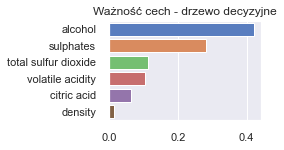

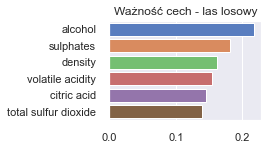

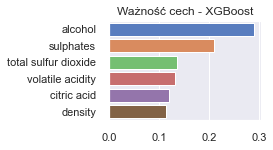

In [227]:
waznosc_RF()

#### Wykres klasyfikacji indeksów za pomocą biblioteki shap

In [228]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42, base_score=0.5)
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [229]:
# Shapley- Daje ona ogólny wgląd w model i ułatwia interpretację poszczególnych prognoz.
# Sprawdzamy prognozowany wynik dla próbki o indeksie __.

sample_idx =411
xgr.predict (X_train.iloc[[sample_idx]]) 

array([-0.00170045], dtype=float32)

In [234]:
import shap 
shap.initjs()
exp = shap. TreeExplainer (xgr)
vals = exp.shap_values (X_train)
shap.force_plot(exp.expected_value,vals [sample_idx], X_train.iloc[sample_idx],)

#Utworzono obiekt TreeExplainer i wyliczono wartość shap dla próbek. Po utworzeniu obiektu w wyliczeniu wartości utworzona wykres siłowy ułatwiające interpretację prognozowanych wartości
# Wykres siłowy opisujący model regresyjny; poszczególne cechy obniżają wartość bazową z 0,137 do 27
# Base Value to prognozowana wartość bazowa,  czerwone cechy to te które podnoszą jakość wszystkie to te które obniżają jakość.  

In [235]:
# Można również utworzyć wykres siłowy dla wszystkich próbek i uzyskać w ten sposób obraz działania całego modelu. 
# Jeżeli w środowisku Jupyter jest włączo na obsługa skryptów JavaScript, po umieszczeniu nad próbką wskaźnika my szy pojawia się informacja o cechach, 
# które wpływają na prognozowany wynik. Poniższy kod tworzy interaktywny wykres:

shap.force_plot( exp.expected_value, vals, X_train)

####                                                *Dziękujemy za uwagę*